A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
- Customer_Age: Customer's Age in Years
- Gender: Customer Gender - M=Male, F=Female
- Dependant_count: Number of dependents
- Education_Level: Educational Qualification of the account holder (example: high school, college graduate, etc.)
- Marital_Status: Married, Single, Divorced, Unknown
- Income_Category: Annual Income Category of the account holder (< 40K, 40K - 60K, 60K - 80K, 80K-120K, >
- Card_Category: Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book: Period of relationship with bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: Total Revolving Balance on the Credit Card
- Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
- Avg_Utilization_Ratio: Average Card Utilization Ratio


Tema: Predviđanje otkazivanja usluga klijenata kreditnih kartica.

Uključivanje biblioteka:

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from kneed import  KneeLocator
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


warnings.filterwarnings("ignore")

Priprema podataka

Ucitavanje podataka:

In [164]:
df_start = pd.read_csv("BankChurners.csv")
df_start = df_start.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1)
df_start = df_start.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1)
df_start = df_start.drop('CLIENTNUM', axis=1)
df_start.head(5)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

Provera i izbacivanje duplikata iz data seta:

In [165]:
print(df_start.shape)
dups = df_start.duplicated()
print(dups[dups == True])
df_start = df_start.drop_duplicates()
print(df_start.shape)

(10127, 20)
Series([], dtype: bool)
(10127, 20)


Provera da li postoje null vrednosti

In [166]:
df_start.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [167]:
df_start.describe(include='all')

Attrition_Flag  Customer_Age Gender  Dependent_count  \
count               10127  10127.000000  10127     10127.000000   
unique                  2           NaN      2              NaN   
top     Existing Customer           NaN      F              NaN   
freq                 8500           NaN   5358              NaN   
mean                  NaN     46.325960    NaN         2.346203   
std                   NaN      8.016814    NaN         1.298908   
min                   NaN     26.000000    NaN         0.000000   
25%                   NaN     41.000000    NaN         1.000000   
50%                   NaN     46.000000    NaN         2.000000   
75%                   NaN     52.000000    NaN         3.000000   
max                   NaN     73.000000    NaN         5.000000   

       Education_Level Marital_Status Income_Category Card_Category  \
count            10127          10127           10127         10127   
unique               7              4               6             4   
top           Graduate        Married  Less than $40K          Blue   
freq              3128           4687            3561          9436   
mean               NaN            NaN             NaN           NaN   
std                NaN            NaN             NaN           NaN   
min                NaN            NaN             NaN           NaN   
25%                NaN            NaN             NaN           NaN   
50%                NaN            NaN             NaN           NaN   
75%                NaN            NaN             NaN           NaN   
max                NaN            NaN             NaN           NaN   

        Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
count     10127.000000              10127.000000            10127.000000   
unique             NaN                       NaN                     NaN   
top                NaN                       NaN                     NaN   
freq               NaN                       NaN                     NaN   
mean         35.928409                  3.812580                2.341167   
std           7.986416                  1.554408                1.010622   
min          13.000000                  1.000000                0.000000   
25%          31.000000                  3.000000                2.000000   
50%          36.000000                  4.000000                2.000000   
75%          40.000000                  5.000000                3.000000   
max          56.000000                  6.000000                6.000000   

        Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            10127.000000  10127.000000         10127.000000   
unique                    NaN           NaN                  NaN   
top                       NaN           NaN                  NaN   
freq                      NaN           NaN                  NaN   
mean                 2.455317   8631.953698          1162.814061   
std                  1.106225   9088.776650           814.987335   
min                  0.000000   1438.300000             0.000000   
25%                  2.000000   2555.000000           359.000000   
50%                  2.000000   4549.000000          1276.000000   
75%                  3.000000  11067.500000          1784.000000   
max                  6.000000  34516.000000          2517.000000   

        Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
count      10127.000000          10127.000000     10127.000000   
unique              NaN                   NaN              NaN   
top                 NaN                   NaN              NaN   
freq                NaN                   NaN              NaN   
mean        7469.139637              0.759941      4404.086304   
std         9090.685324              0.219207      3397.129254   
min            3.000000              0.000000       510.000000   
25%         1324.500000              0.631000      2155.500000   
50%         3474.000000      

In [168]:

numerical_columns = [
    "Customer_Age", "Dependent_count", "Months_on_book", "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Credit_Limit", 
    "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]

categorical_columns = [
    "Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"
]

Vizualizacija kategoričkih vičera

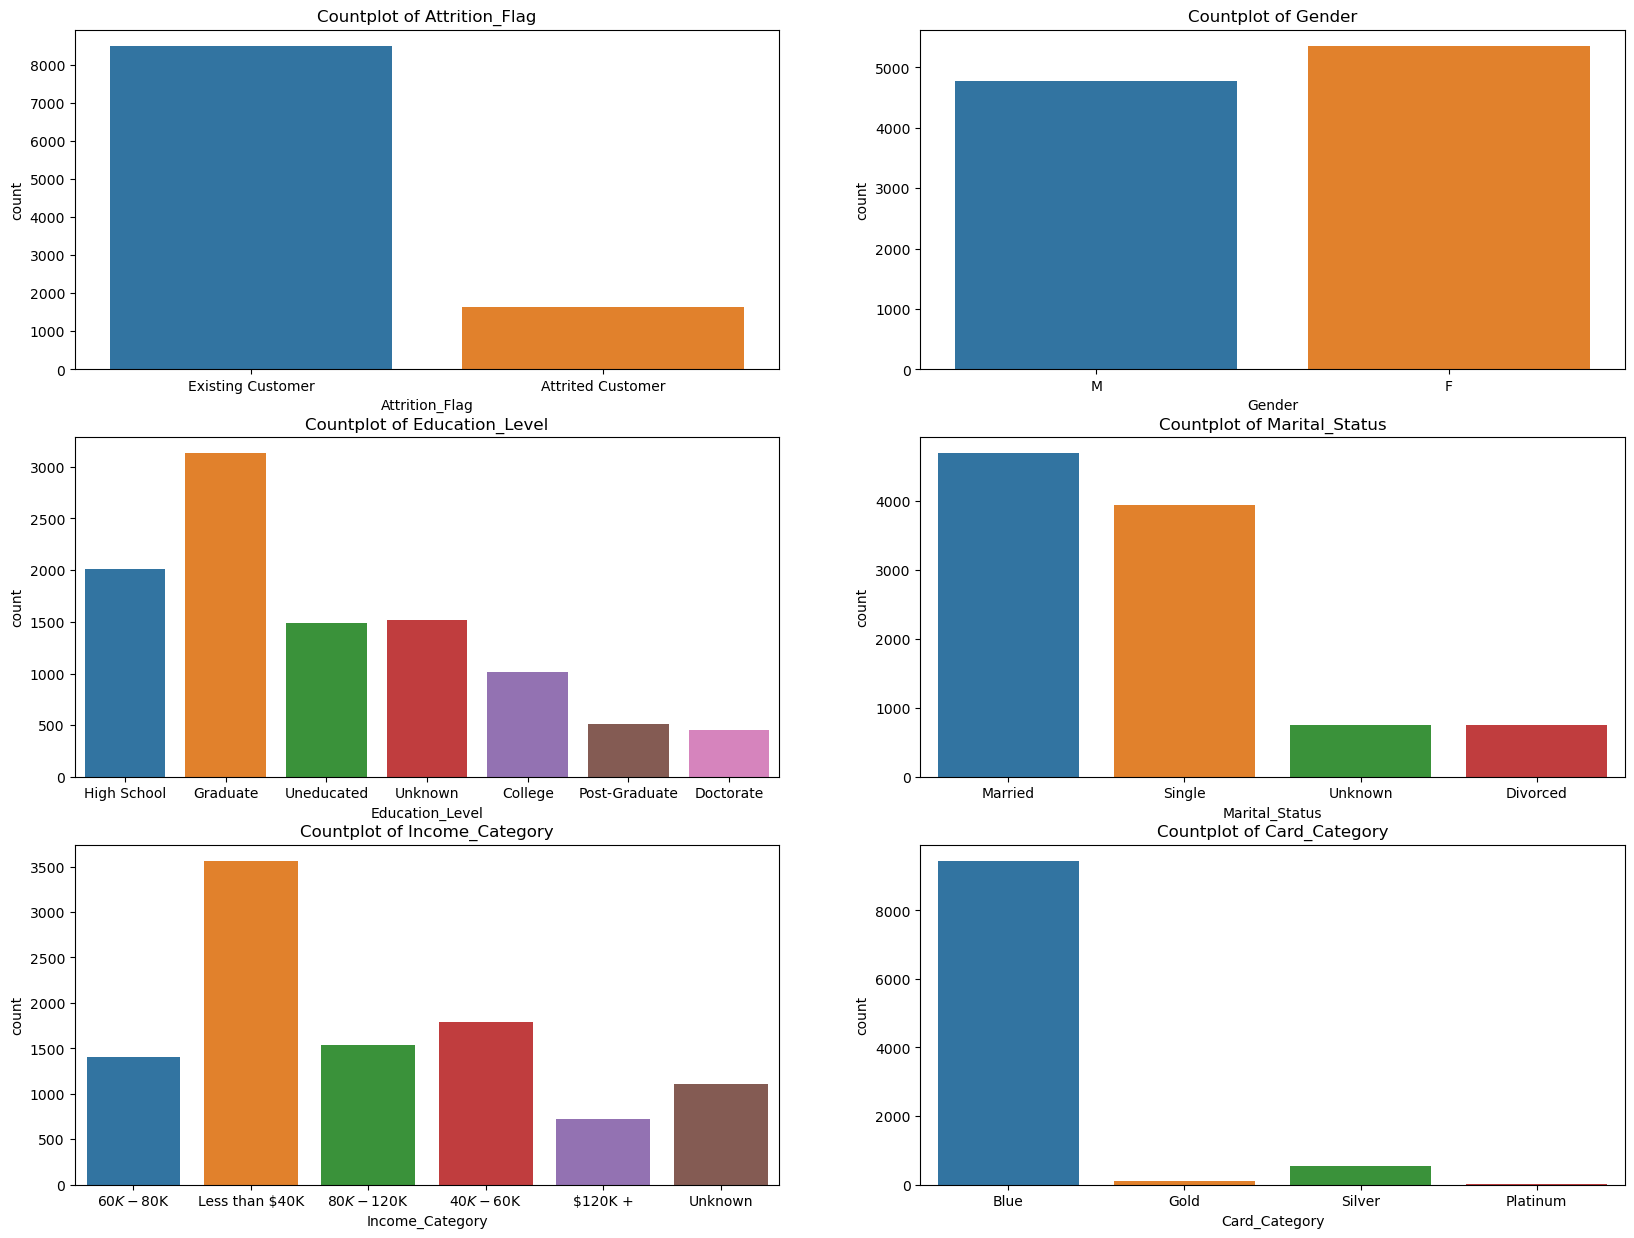

In [169]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

for i, feature in enumerate(categorical_columns):
    sea.countplot(x=feature, data=df_start, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Countplot of {feature}')
 
plt.show()

Ono sto smo zakljucili na osnovu vizualizacije podataka:
        - Da su nam najveci broj korisnika sa godisnjom platom manjom od 40k$
        - Da nam najveći broj korisnika koristi Blue kategoriju kartica.
        - I da imamo mali procenat izgubljenih korisnika.
        - ravnomeran broj muskaraca i zena
        - odnos trenutnih korisnika i korisnika koji su otkazali uluge je nebalansiran 84%-16%

Vizalizacija numeričkih fičera

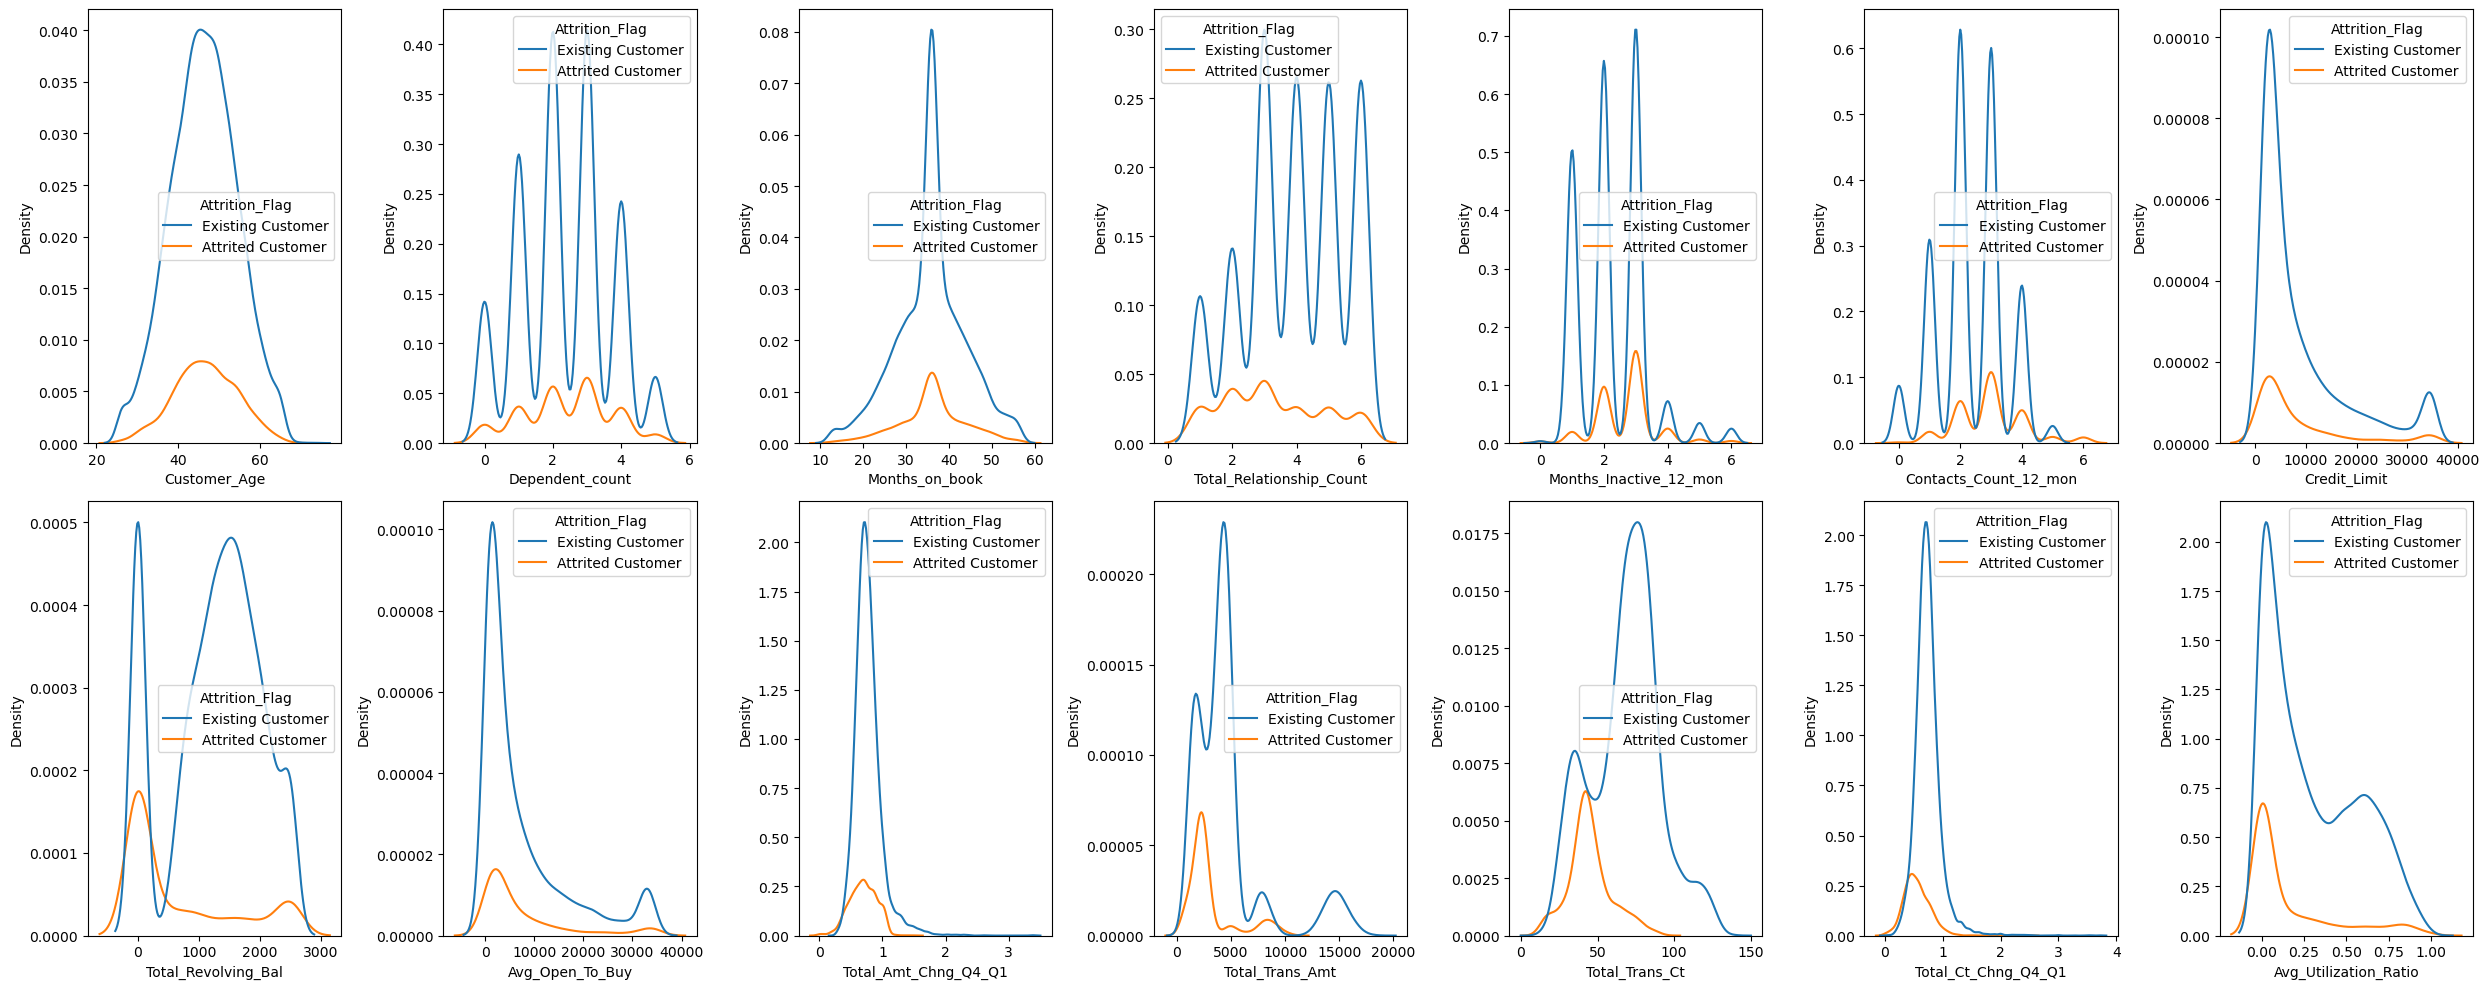

In [170]:
plt.figure(figsize=(25, 10))
for i in range(0, len (numerical_columns)):
    plt.subplot(2, 7, i+1)
    sea.kdeplot(x = df_start[numerical_columns[i]], hue = df_start['Attrition_Flag'])
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()



Encoding kategoričkih feature-a.

In [171]:
label_encoder = LabelEncoder()

df_start['Gender'] = label_encoder.fit_transform(df_start['Gender'])
print("Gender:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

df_start['Marital_Status'] = label_encoder.fit_transform(df_start['Marital_Status'])
print("Marital_Status:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Income_Category_map = {
    'Less than $40K' : 0,
    '$40K - $60K'    : 1,
    '$60K - $80K'    : 1,
    '$80K - $120K'   : 2,
    '$120K +'        : 2,
    'Unknown'        : 3
}

Card_Category_map = {
    'Blue'     : 0,
    'Silver'   : 1,
    'Gold'     : 1,
    'Platinum' : 1
}

Attrition_Flag_map = {
    'Existing Customer' : 0,
    'Attrited Customer' : 1
}

Education_Level_map = {
    'Uneducated'    : 0,
    'High School'   : 1,
    'College'       : 2,
    'Graduate'      : 2,
    'Post-Graduate' : 2,
    'Doctorate'     : 2,
    'Unknown'       : 3
}

df_start['Income_Category'] = df_start['Income_Category'].map(Income_Category_map).astype(int)
df_start['Card_Category'] = df_start['Card_Category'].map(Card_Category_map).astype(int)
df_start['Attrition_Flag'] = df_start['Attrition_Flag'].map(Attrition_Flag_map).astype(int)
df_start['Education_Level'] = df_start['Education_Level'].map(Education_Level_map).astype(int)
df_start.head(5)

Gender: {'F': 0, 'M': 1}
Marital_Status: {'Divorced': 0, 'Married': 1, 'Single': 2, 'Unknown': 3}


Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               0            45       1                3                1   
1               0            49       0                5                2   
2               0            51       1                3                2   
3               0            40       0                4                1   
4               0            40       1                3                0   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               1                1              0              39   
1               2                0              0              44   
2               1                2              0              36   
3               3                0              0              34   
4               1                1              0              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

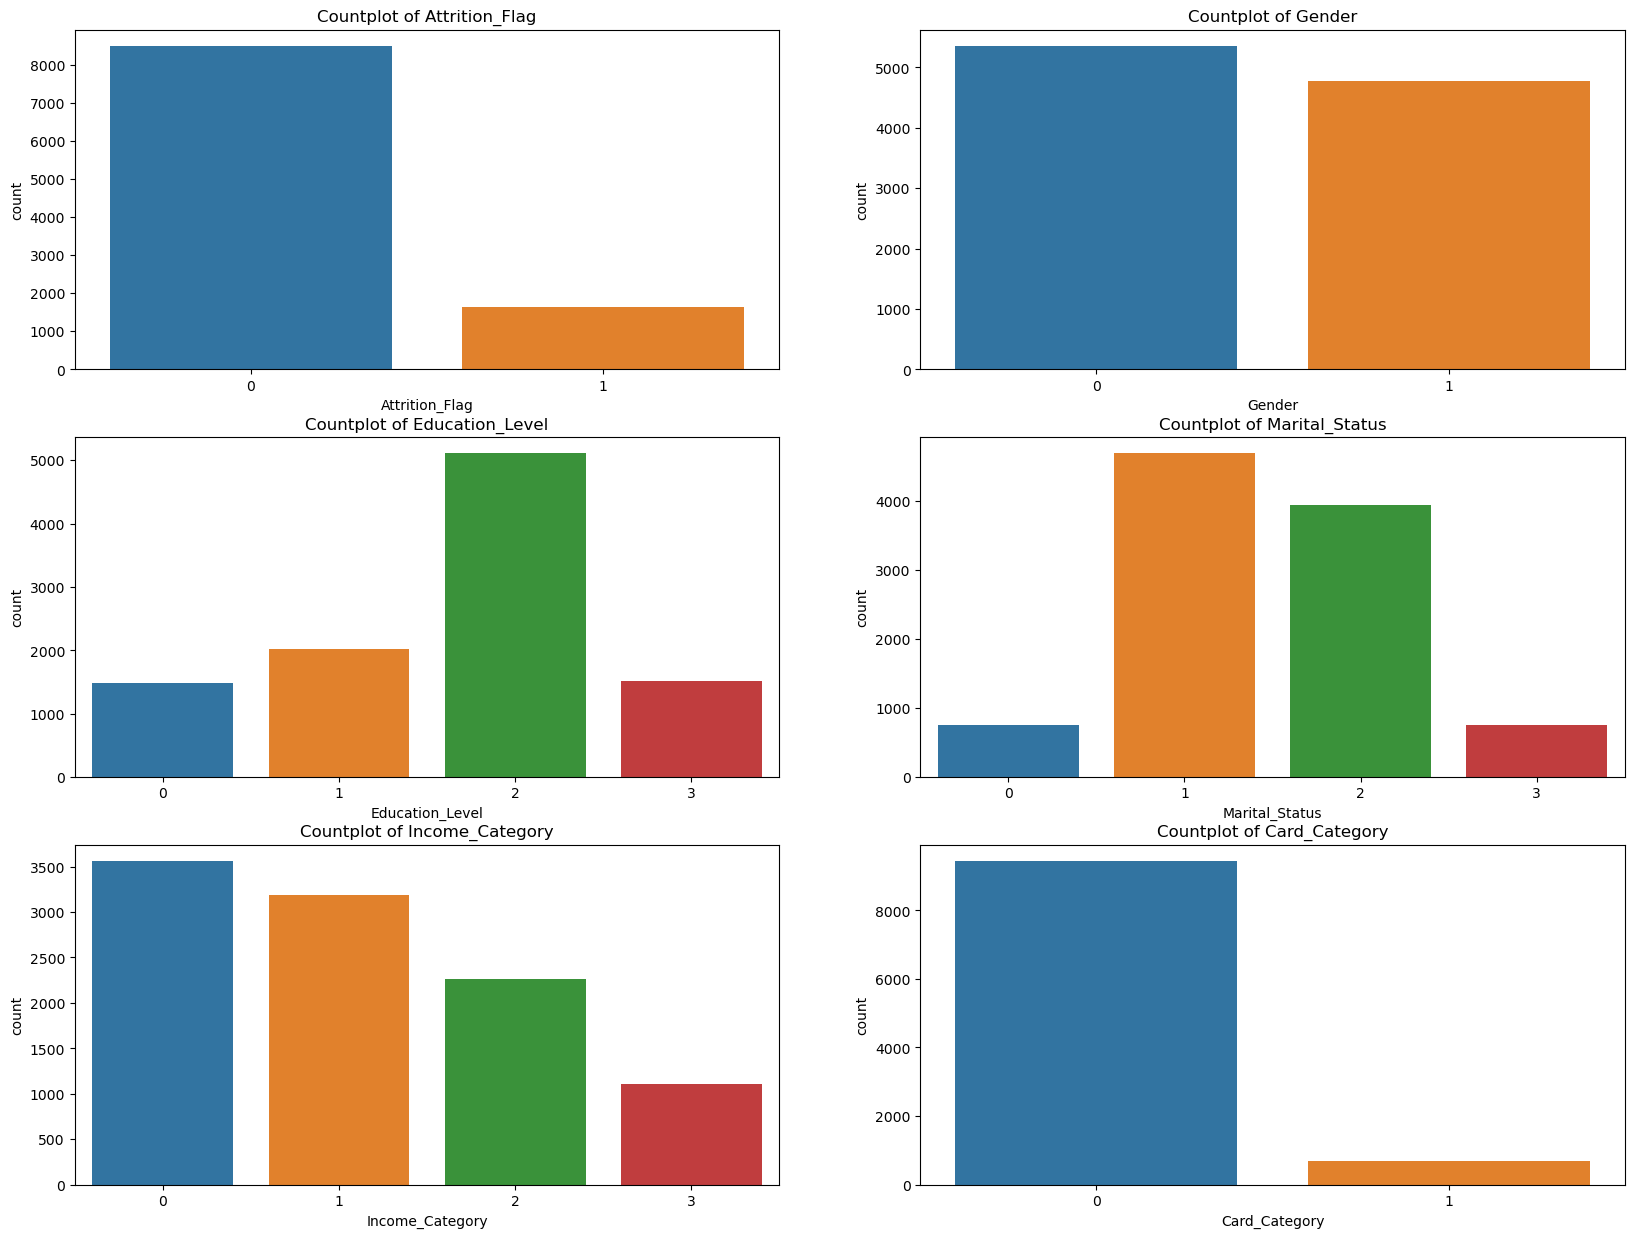

In [172]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

for i, feature in enumerate(categorical_columns):
    sea.countplot(x=feature, data=df_start, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Countplot of {feature}')
 
plt.show()

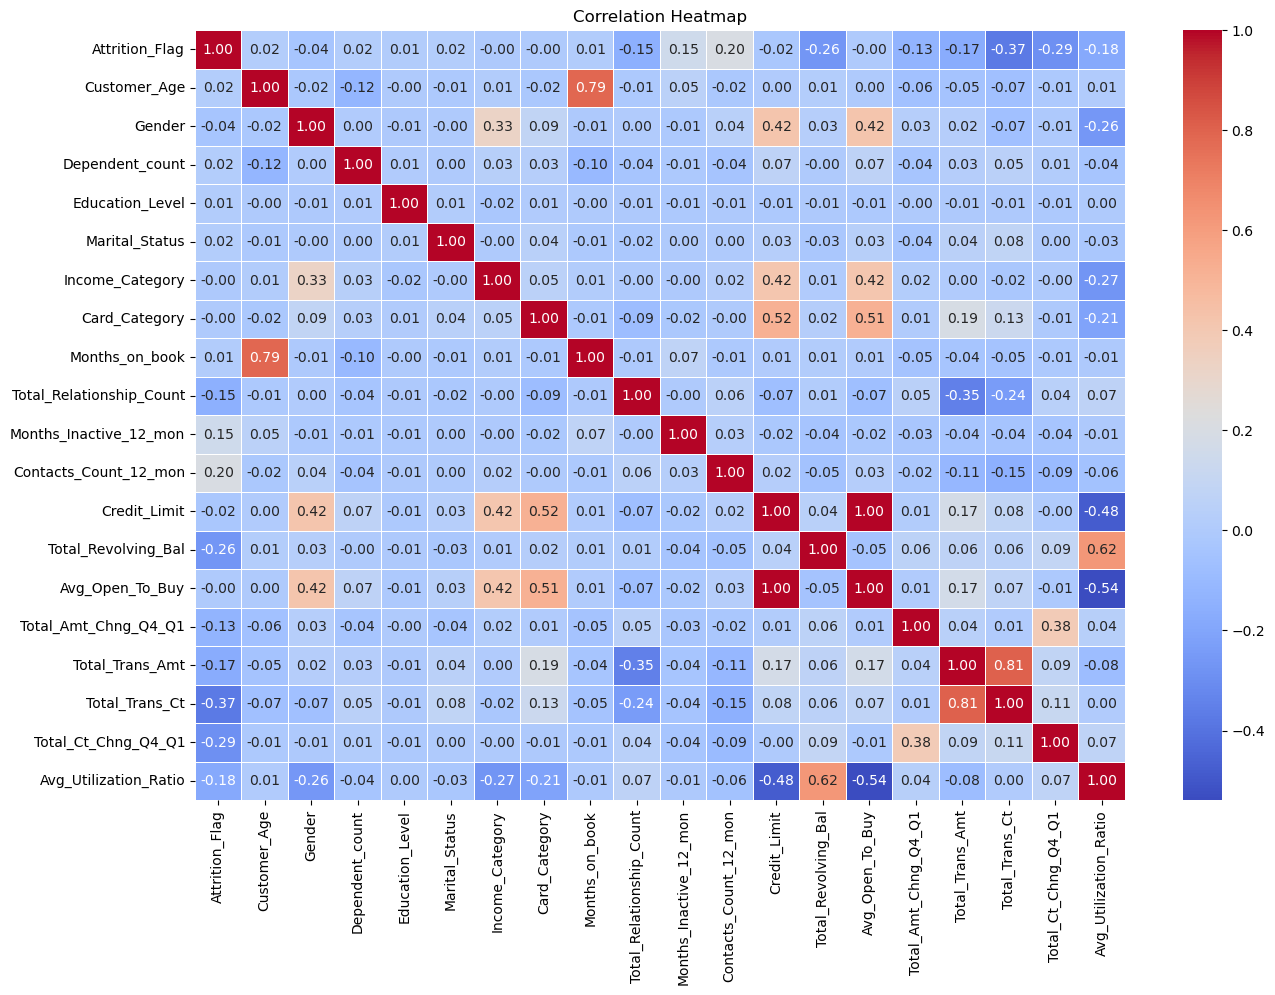

In [173]:
df = df_start.copy()
plt.figure(figsize=(15, 10))
heatmap = sea.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [174]:
columns_to_drop = ["Avg_Open_To_Buy", "Total_Trans_Ct"]
df = df.drop(columns=columns_to_drop, axis=1)
numerical_columns.remove('Avg_Open_To_Buy')
numerical_columns.remove('Total_Trans_Ct')
numerical_columns

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [175]:
def showPCAResults(df, cluster_labels, name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.scatter(df[:, 0], df[:, 1], c=cluster_labels)
    ax1.set_xlabel('Principal Component 1')
    ax1.set_ylabel('Principal Component 2')
    ax1.set_title(f'{name} Clustering on PCA Results (2D)')
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(df[:, 0], df[:, 1], df[:, 2], c=cluster_labels)
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')
    ax2.set_zlabel('PC3')
    ax2.set_title(f'{name} Clustering on PCA Results (3D)')
    plt.tight_layout()
    plt.show()

def showFeatureImportance(feature_importance, columns = df.columns):
    plt.figure(figsize=(10, 6))
    plt.bar(columns, feature_importance)
    plt.xticks(rotation=90)
    plt.title('Feature importance based on centroids')
    plt.legend()
    plt.tight_layout()

In [176]:
df_1 = df.copy()
scaler = StandardScaler()
df_1[df_1.columns] = scaler.fit_transform(df_1[df_1.columns])
df_1.head(5)

df_2 = df.copy()
scaler = MinMaxScaler(feature_range=(0, 1))
df_2[df_2.columns] = scaler.fit_transform(df_2[df_2.columns])
df_2.head(5)

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0             0.0      0.404255     1.0              0.6         0.333333   
1             0.0      0.489362     0.0              1.0         0.666667   
2             0.0      0.531915     1.0              0.6         0.666667   
3             0.0      0.297872     0.0              0.8         0.333333   
4             0.0      0.297872     1.0              0.6         0.000000   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0        0.333333         0.333333            0.0        0.604651   
1        0.666667         0.000000            0.0        0.720930   
2        0.333333         0.666667            0.0        0.534884   
3        1.000000         0.000000            0.0        0.488372   
4        0.333333         0.333333            0.0        0.186047   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                       0.8                0.166667               0.500000   
1                       1.0                0.166667               0.333333   
2                       0.6                0.166667               0.000000   
3                       0.4                0.666667               0.166667   
4                       0.8                0.166667               0.000000   

   Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0      0.340190             0.308701              0.392994         0.035273   
1      0.206112             0.343266              0.453636         0.043452   
2      0.059850             0.000000              0.763615         0.076611   
3      0.056676             1.000000              0.413600         0.036775   
4      0.099091             0.000000              0.640271         0.017025   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             0.437534               0.061061  
1             1.000000               0.105105  
2             0.628164               0.000000  
3             0.628164               0.760761  
4             0.673129               0.000000

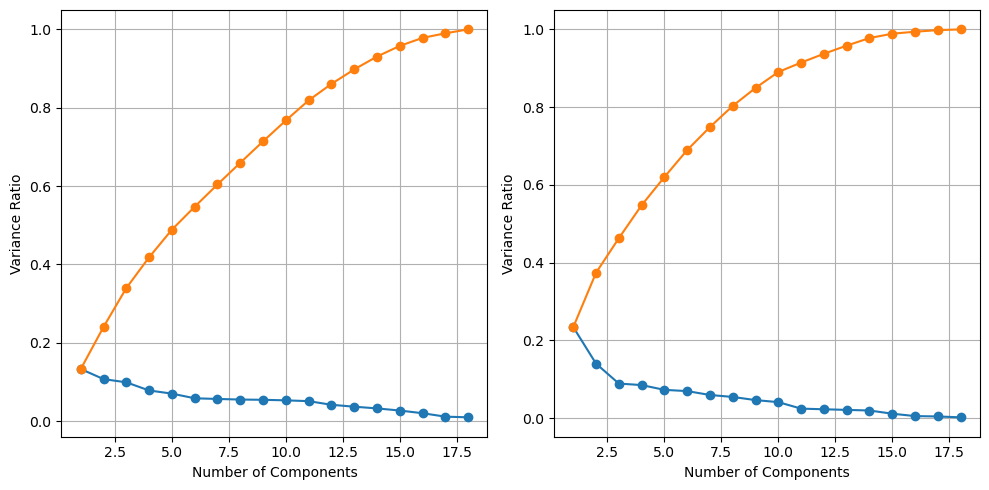

In [177]:
pca = PCA()
pca.fit(df_1)
explained_variance_ratio1 = pca.explained_variance_ratio_
cumulative_explained_variance1 = np.cumsum(explained_variance_ratio1)

pca = PCA()
pca.fit(df_2)
explained_variance_ratio2 = pca.explained_variance_ratio_
cumulative_explained_variance2 = np.cumsum(explained_variance_ratio2)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(range(1, len(explained_variance_ratio1) + 1), explained_variance_ratio1, marker='o', label='Explained Variance Ratio')
axes[0].plot(range(1, len(cumulative_explained_variance1) + 1), cumulative_explained_variance1, marker='o', label='Cumulative Explained Variance')
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Variance Ratio')
axes[0].grid()
axes[1].plot(range(1, len(explained_variance_ratio2) + 1), explained_variance_ratio2, marker='o', label='Explained Variance Ratio')
axes[1].plot(range(1, len(cumulative_explained_variance2) + 1), cumulative_explained_variance2, marker='o', label='Cumulative Explained Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Variance Ratio')
axes[1].grid()
plt.tight_layout()
plt.show()

In [178]:
print(df_1.shape)
pca = PCA(n_components=0.95)
df_pca1 = pca.fit_transform(df_1)
print(df_pca1.shape)

print(df_2.shape)
pca = PCA(n_components=0.95)
df_pca2 = pca.fit_transform(df_2)
print(df_pca2.shape)

(10127, 18)
(10127, 15)
(10127, 18)
(10127, 13)


In [179]:
num_of_clusters = range(2,12)
rand_num = 7

In [180]:
results = pd.DataFrame(columns=['Clusters', 'In_df1', 'Si_df1', 'CH_df1', 'In_df2', 'Si_df2', 'CH_df2',
                                'In_dfpca1', 'Si_dfpca1', 'CH_dfpca1', 'In_dfpca2', 'Si_dfpca2', 'CH_dfpca2'])
dfs = []
for i in num_of_clusters:
    km1 = KMeans(n_clusters=i, random_state=rand_num).fit(df_1)
    km2 = KMeans(n_clusters=i, random_state=rand_num).fit(df_2)
    km1pca = KMeans(n_clusters=i, random_state=rand_num).fit(df_pca1)
    km2pca = KMeans(n_clusters=i, random_state=rand_num).fit(df_pca2)
    df_row = pd.DataFrame({'Clusters': [i],
                        'In_df1' : [km1.inertia_],
                        'Si_df1': [silhouette_score(df_1, km1.labels_)],
                        'CH_df1': [calinski_harabasz_score(df_1, km1.labels_)],
                        'In_df2' : [km2.inertia_],
                        'Si_df2': [silhouette_score(df_2, km2.labels_)],
                        'CH_df2': [calinski_harabasz_score(df_2, km2.labels_)],
                        'In_dfpca1' : [km1pca.inertia_],
                        'Si_dfpca1': [silhouette_score(df_pca1, km1pca.labels_)],
                        'CH_dfpca1': [calinski_harabasz_score(df_pca1, km1pca.labels_)],
                        'In_dfpca2' : [km2pca.inertia_],
                        'Si_dfpca2': [silhouette_score(df_pca2, km2pca.labels_)],
                        'CH_dfpca2': [calinski_harabasz_score(df_pca2, km2pca.labels_)]
                        })
    dfs.append(df_row)

results = pd.concat(dfs, ignore_index=True)
display(results)

Clusters         In_df1    Si_df1      CH_df1        In_df2    Si_df2  \
0         2  165912.497224  0.087490  999.216274  10339.828296  0.214255   
1         3  153944.230796  0.099874  931.938457   9268.932939  0.218721   
2         4  144048.309905  0.106869  895.718658   8629.092230  0.221541   
3         5  137040.449638  0.097050  835.475696   8034.014384  0.208234   
4         6  131193.775104  0.101547  788.307125   7660.296294  0.169833   
5         7  126973.828400  0.093820  734.745641   7251.582529  0.185604   
6         8  123161.477042  0.093598  693.958531   6910.859981  0.146421   
7         9  119747.647354  0.090937  660.518004   6697.024012  0.145200   
8        10  117423.005360  0.087200  620.944871   6522.069911  0.133444   
9        11  115312.845321  0.085903  587.532491   6348.897777  0.137009   

        CH_df2      In_dfpca1  Si_dfpca1    CH_dfpca1    In_dfpca2  Si_dfpca2  \
0  2779.744646  158282.596851   0.091630  1044.749477  9790.198190   0.223752   
1  2135.142658  146728.134952   0.102807   962.075567  8720.382952   0.229248   
2  1779.027847  136702.790332   0.112618   935.816403  8085.211784   0.213747   
3  1620.392126  129817.046405   0.100558   873.243797  7555.536638   0.193130   
4  1458.175212  124042.646597   0.105587   825.268794  7070.656102   0.235460   
5  1378.581876  119902.970797   0.099447   769.632426  6713.529323   0.197397   
6  1311.039075  116082.191565   0.096957   728.908911  6377.247562   0.155689   
7  1224.053119  112721.766381   0.094485   694.449465  6161.398666   0.154566   
8  1147.281263  110146.582086   0.096269   657.938815  5980.066602   0.139815   
9  1088.204870  108324.392389   0.097600   619.062249  5841.071989   0.140334   

     CH_dfpca2  
0  2935.769507  
1  2268.807248  
2  1896.289858  
3  1699.167641  
4  1591.221386  
5  1486.141340  
6  1417.102464  
7  1327.587009  
8  1249.823211  
9  1175.564654

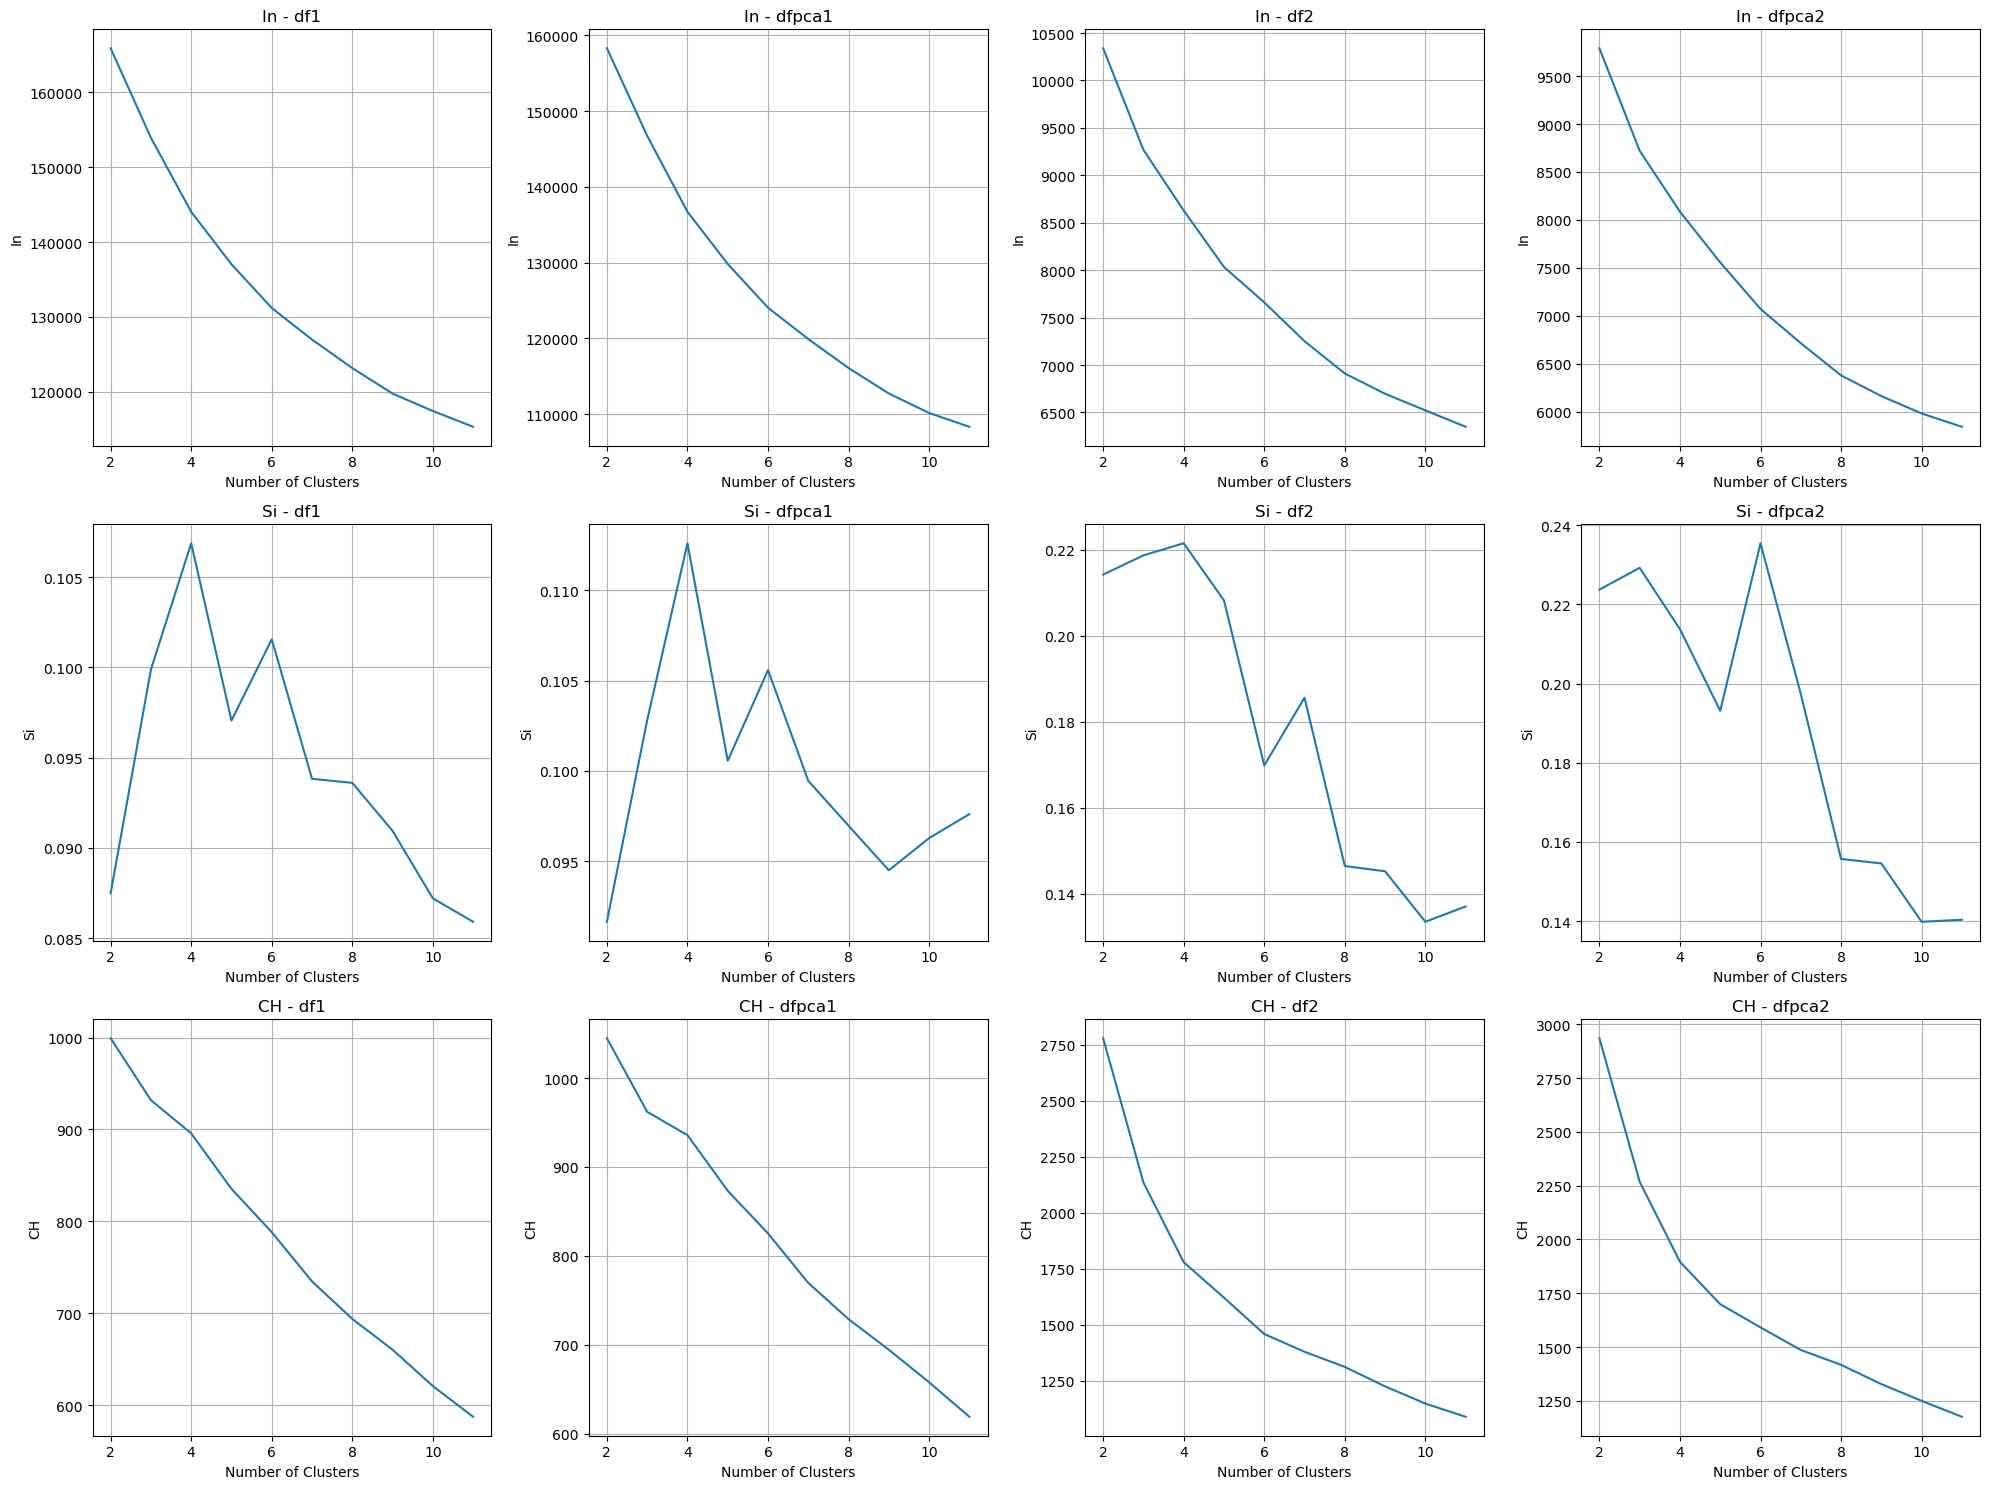

In [181]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for idx, metric in enumerate(['In', 'Si', 'CH']):
    for i, col in enumerate(['df1', 'dfpca1', 'df2', 'dfpca2']):
        ax = axes[idx, i]
        ax.plot(results['Clusters'], results[f'{metric}_{col}'])
        ax.set_title(f'{metric} - {col}')
        ax.set_xlabel('Number of Clusters')
        ax.set_ylabel(metric)
        ax.grid()

plt.tight_layout()
plt.show()

In [182]:
topResKMeans = pd.DataFrame(columns=['DataSet', 'Inertia', 'Silhouette', 'Calinski-Harabasz'])
dfs = []
for i, col in enumerate(['df1', 'dfpca1', 'df2', 'dfpca2']):
    maxSil = results.loc[results[f'Si_{col}'].idxmax()]
    maxCH = results.loc[results[f'CH_{col}'].idxmax()]
    df_row = pd.DataFrame({'DataSet': [col],
                    'Inertia' : KneeLocator(num_of_clusters, results[f'In_{col}'], curve="convex", direction="decreasing").elbow,
                    'Silhouette': f"[{maxSil['Clusters']}]_{maxSil[f'Si_{col}']}",
                    'Calinski-Harabasz': f"[{maxCH['Clusters']}]_{maxCH[f'CH_{col}']}"
                    })
    dfs.append(df_row)
topResKMeans = pd.concat(dfs, ignore_index=True)
display(topResKMeans)

DataSet  Inertia                 Silhouette         Calinski-Harabasz
0     df1        6  [4.0]_0.10686928455051468   [2.0]_999.2162735279296
1  dfpca1        6  [4.0]_0.11261768499093963  [2.0]_1044.7494774291117
2     df2        5  [4.0]_0.22154079080437458  [2.0]_2779.7446460048986
3  dfpca2        6  [6.0]_0.23545989061786227  [2.0]_2935.7695071639146

In [183]:
print(df_2.shape)
pca_kmeans = PCA(n_components=13)
df_pca_kmeans = pca_kmeans.fit_transform(df_2)
print(df_pca_kmeans.shape)

(10127, 18)
(10127, 13)


In [184]:
cluster_number_kmeans = 6

0.2354598906178624


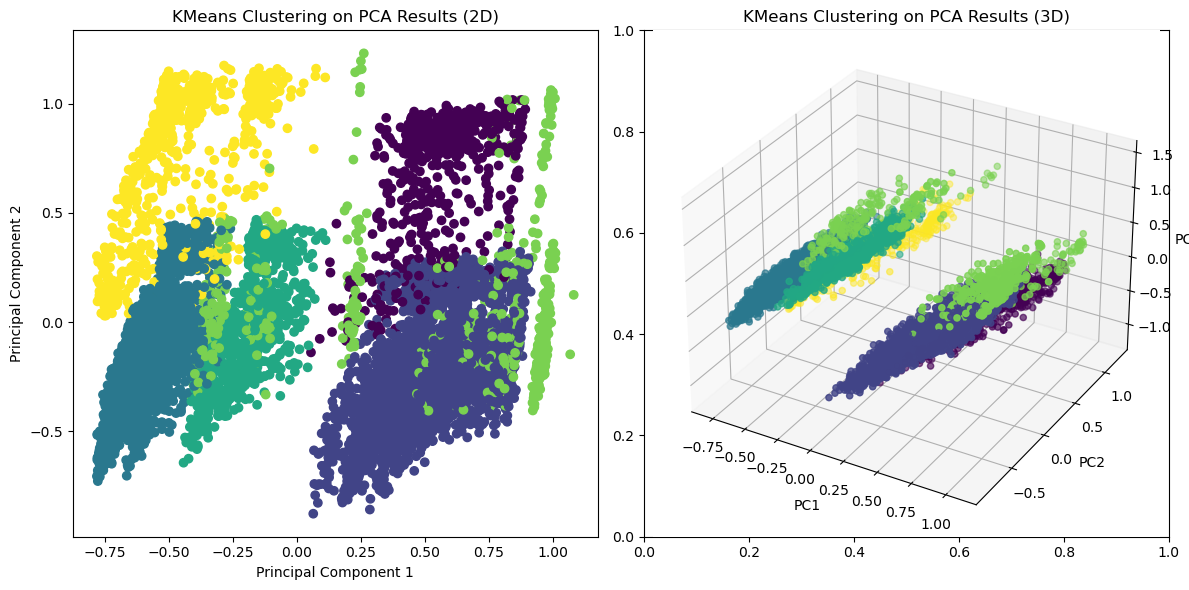

In [185]:
km = KMeans(n_clusters=cluster_number_kmeans, random_state=7).fit(df_pca_kmeans)
labels = km.labels_
print(silhouette_score(df_pca_kmeans, labels))
showPCAResults(df_pca_kmeans, labels, 'KMeans')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Index(['Attrition_Flag', 'Gender', 'Income_Category', 'Card_Category',
       'Credit_Limit'],
      dtype='object')


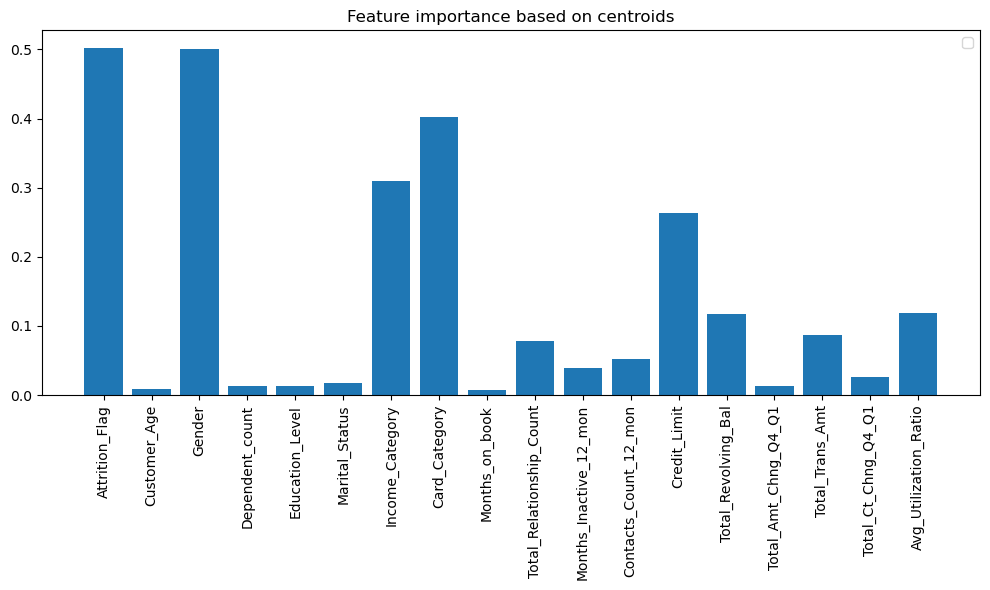

In [186]:
original_space_centroids = pca_kmeans.inverse_transform(km.cluster_centers_)
centroids_df = pd.DataFrame(original_space_centroids, columns=df.columns)

feature_importance = centroids_df.std(axis=0)
showFeatureImportance(feature_importance)

important_columns = df.columns[feature_importance > 0.2]
print(important_columns)

In [187]:
cluster_data = np.array(
    [df_2[km.labels_ == i][important_columns].mean(axis=0) for i in range(cluster_number_kmeans)])
cluster_data_kmeans = pd.DataFrame(
    cluster_data.T, columns=range(cluster_number_kmeans), index=important_columns)
cluster_data_kmeans

0         1         2         3         4         5
Attrition_Flag   1.000000  0.000000  0.000000  0.001212  0.105828  1.000000
Gender           1.000000  1.000000  0.000000  0.000000  0.648773  0.000000
Income_Category  0.493750  0.474726  0.078732  1.000000  0.447853  0.245365
Card_Category    0.017188  0.000000  0.000000  0.000000  1.000000  0.030534
Credit_Limit     0.293023  0.287444  0.063026  0.200204  0.761627  0.081104

Klaster 0:
Attrition_Flag: Svi klijenti u ovom klasteru su napustili usluge.
Gender: Svi klijenti su muškog pola.
Income_Category: Ovaj klaster sadrži klijente sa srednjim prihodima.
Card_Category: Većina klijenata u ovom klasteru koristi Blue karticu.
Credit_Limit: Klijenti u ovom klasteru imaju srednje do visoke vrednosti kreditnih limita.

Klaster 1:
Attrition_Flag: Svi klijenti u ovom klasteru su zadržali usluge.
Gender: Svi klijenti su muškog pola.
Income_Category: Ovaj klaster sadrži klijente sa niskim prihodima.
Card_Category: Većina klijenata u ovom klasteru koristi Blue karticu.
Credit_Limit: Klijenti u ovom klasteru imaju niske do srednje vrednosti kreditnih limita.

Klaster 2:
Attrition_Flag: Svi klijenti u ovom klasteru su zadržali usluge.
Gender: Svi klijenti su ženskog pola.
Income_Category: Ovaj klaster sadrži klijente sa veoma niskim prihodima.
Card_Category: Većina klijenata u ovom klasteru koristi Blue karticu.
Credit_Limit: Klijenti u ovom klasteru imaju niske vrednosti kreditnih limita.

Klaster 3:
Attrition_Flag: Većina klijenata u ovom klasteru je zadržala usluge.
Gender: Ima i muških i ženskih klijenata.
Income_Category: Ovaj klaster sadrži klijente sa veoma niskim prihodima.
Card_Category: Klijenti u ovom klasteru uglavnom koriste Blue karticu.
Credit_Limit: Klijenti u ovom klasteru imaju veoma niske vrednosti kreditnih limita.

Klaster 4:
Attrition_Flag: Većina klijenata u ovom klasteru je zadržala usluge.
Gender: Većina klijenata je muškog pola.
Income_Category: Ovaj klaster sadrži klijente sa srednjim prihodima.
Card_Category: Svi klijenti u ovom klasteru koriste Platinum karticu.
Credit_Limit: Klijenti u ovom klasteru imaju visoke vrednosti kreditnih limita.

Klaster 5:
Attrition_Flag: Svi klijenti u ovom klasteru su napustili usluge.
Gender: Većina klijenata je muškog pola.
Income_Category: Ovaj klaster sadrži klijente sa srednjim prihodima.
Card_Category: Svi klijenti u ovom klasteru koriste Gold karticu.
Credit_Limit: Klijenti u ovom klasteru imaju veoma visoke vrednosti kreditnih limita.

In [188]:
allResults = pd.DataFrame(columns=['Algorithm', 'DataSet', 'ClusterNumber', 'Silhouette'])
df_2_reducted = df_2[important_columns]

In [189]:
km = KMeans(n_clusters=6, random_state=rand_num).fit(df_2_reducted)
labels_kmeans = km.labels_
df_row = pd.DataFrame({'Algorithm': ['KMeans'],
                    'DataSet': ['df_2_reducted'],
                    'ClusterNumber' : [6],
                    'Silhouette': [silhouette_score(df_2_reducted, labels_kmeans)]
                    })
allResults = pd.concat([allResults, df_row], ignore_index=True)
display(allResults)

Algorithm        DataSet ClusterNumber  Silhouette
0    KMeans  df_2_reducted             6    0.668626

In [190]:
cluster_data = np.array(
    [df_2_reducted[labels_kmeans == i][important_columns].mean(axis=0) for i in range(cluster_number_kmeans)])
cluster_data_kmeans_reducted = pd.DataFrame(
    cluster_data.T, columns=range(cluster_number_kmeans), index=important_columns)
cluster_data_kmeans_reducted

0         1         2         3         4         5
Attrition_Flag   0.000000  0.000000  1.000000  0.000000  1.000000  0.118182
Gender           1.000000  0.000000  0.000000  0.000000  1.000000  0.653030
Income_Category  0.474726  0.078732  0.246092  1.000000  0.495781  0.445455
Card_Category    0.000000  0.000000  0.029444  0.001212  0.004747  1.000000
Credit_Limit     0.287444  0.063026  0.081008  0.199706  0.290286  0.759324

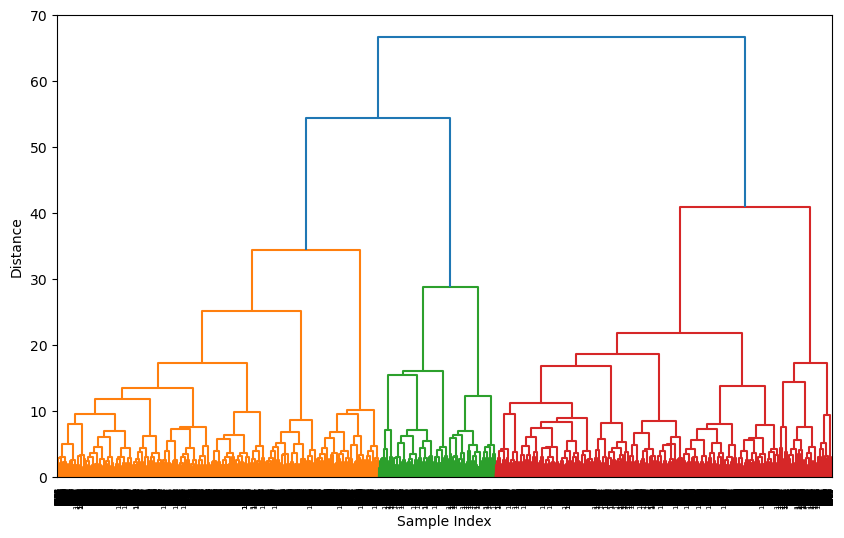

In [191]:
plt.figure(figsize=(10, 6))
linked = linkage(df_pca2, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [192]:
results_HC = pd.DataFrame(columns=['Clusters', 'Si_df1', 'DB_df1', 'CH_df1', 'Si_df2', 'DB_df2', 'CH_df2',
                                'Si_dfpca1', 'DB_dfpca1', 'CH_dfpca1', 'Si_dfpca2', 'DB_dfpca2', 'CH_dfpca2'])
dfs = []
for i in range(2, 12):
    model = AgglomerativeClustering(n_clusters=i)
    labels_df1 = model.fit_predict(df_1)
    labels_df2 = model.fit_predict(df_2)
    labels_dfpca1 = model.fit_predict(df_pca1)
    labels_dfpca2 = model.fit_predict(df_pca2)
    df_row = pd.DataFrame({'Clusters': [i],
                    'Si_df1' : [silhouette_score(df_1, labels_df1)],
                    'DB_df1': [davies_bouldin_score(df_1, labels_df1)],
                    'CH_df1': [calinski_harabasz_score(df_1, labels_df1)],

                    'Si_df2' : [silhouette_score(df_2, labels_df2)],
                    'DB_df2': [davies_bouldin_score(df_2, labels_df2)],
                    'CH_df2': [calinski_harabasz_score(df_2, labels_df2)],
                    
                    'Si_dfpca1' : [silhouette_score(df_pca1, labels_dfpca1)],
                    'DB_dfpca1': [davies_bouldin_score(df_pca1, labels_dfpca1)],
                    'CH_dfpca1': [calinski_harabasz_score(df_pca1, labels_dfpca1)],
                    
                    'Si_dfpca2' : [silhouette_score(df_pca2, labels_dfpca2)],
                    'DB_dfpca2': [davies_bouldin_score(df_pca2, labels_dfpca2)],
                    'CH_dfpca2': [calinski_harabasz_score(df_pca2, labels_dfpca2)]
                    })
    dfs.append(df_row)
results_HC = pd.concat(dfs, ignore_index=True)
display(results_HC)

Clusters    Si_df1    DB_df1      CH_df1    Si_df2    DB_df2       CH_df2  \
0         2  0.225945  1.697930  823.682895  0.177298  2.115964  2055.653293   
1         3  0.138195  2.160208  851.689195  0.209656  1.749800  1979.502070   
2         4  0.085163  2.876758  775.334010  0.221690  1.630148  1775.842077   
3         5  0.089866  2.648872  718.125062  0.207773  1.617153  1617.603040   
4         6  0.072523  2.556180  674.560427  0.221661  1.639648  1473.933933   
5         7  0.075256  2.464840  626.497980  0.185595  1.676598  1354.023037   
6         8  0.078313  2.398787  591.392340  0.148523  1.996404  1233.378392   
7         9  0.061020  2.374281  555.339586  0.156090  1.971703  1141.217242   
8        10  0.066787  2.421466  521.962759  0.138143  1.990960  1068.635768   
9        11  0.063308  2.540070  495.401264  0.136575  2.015931  1012.229982   

   Si_dfpca1  DB_dfpca1   CH_dfpca1  Si_dfpca2  DB_dfpca2    CH_dfpca2  
0   0.228285   1.679835  841.191260   0.185122   2.055802  2163.063320  
1   0.143414   2.115779  883.804518   0.219742   1.694525  2099.792780  
2   0.087457   2.767596  814.627810   0.232567   1.578390  1894.595935  
3   0.095030   2.525360  760.441836   0.220117   1.559509  1733.177424  
4   0.072075   2.434295  696.139845   0.234485   1.580540  1585.226978  
5   0.076955   2.337354  653.381800   0.198930   1.617593  1461.996144  
6   0.081087   2.267956  619.814647   0.144120   1.945492  1351.006987  
7   0.077003   2.336560  590.994507   0.140541   1.998735  1248.910079  
8   0.081508   2.343480  554.105627   0.117920   2.121989  1164.079906  
9   0.080081   2.247776  522.877851   0.124595   2.109510  1097.793680

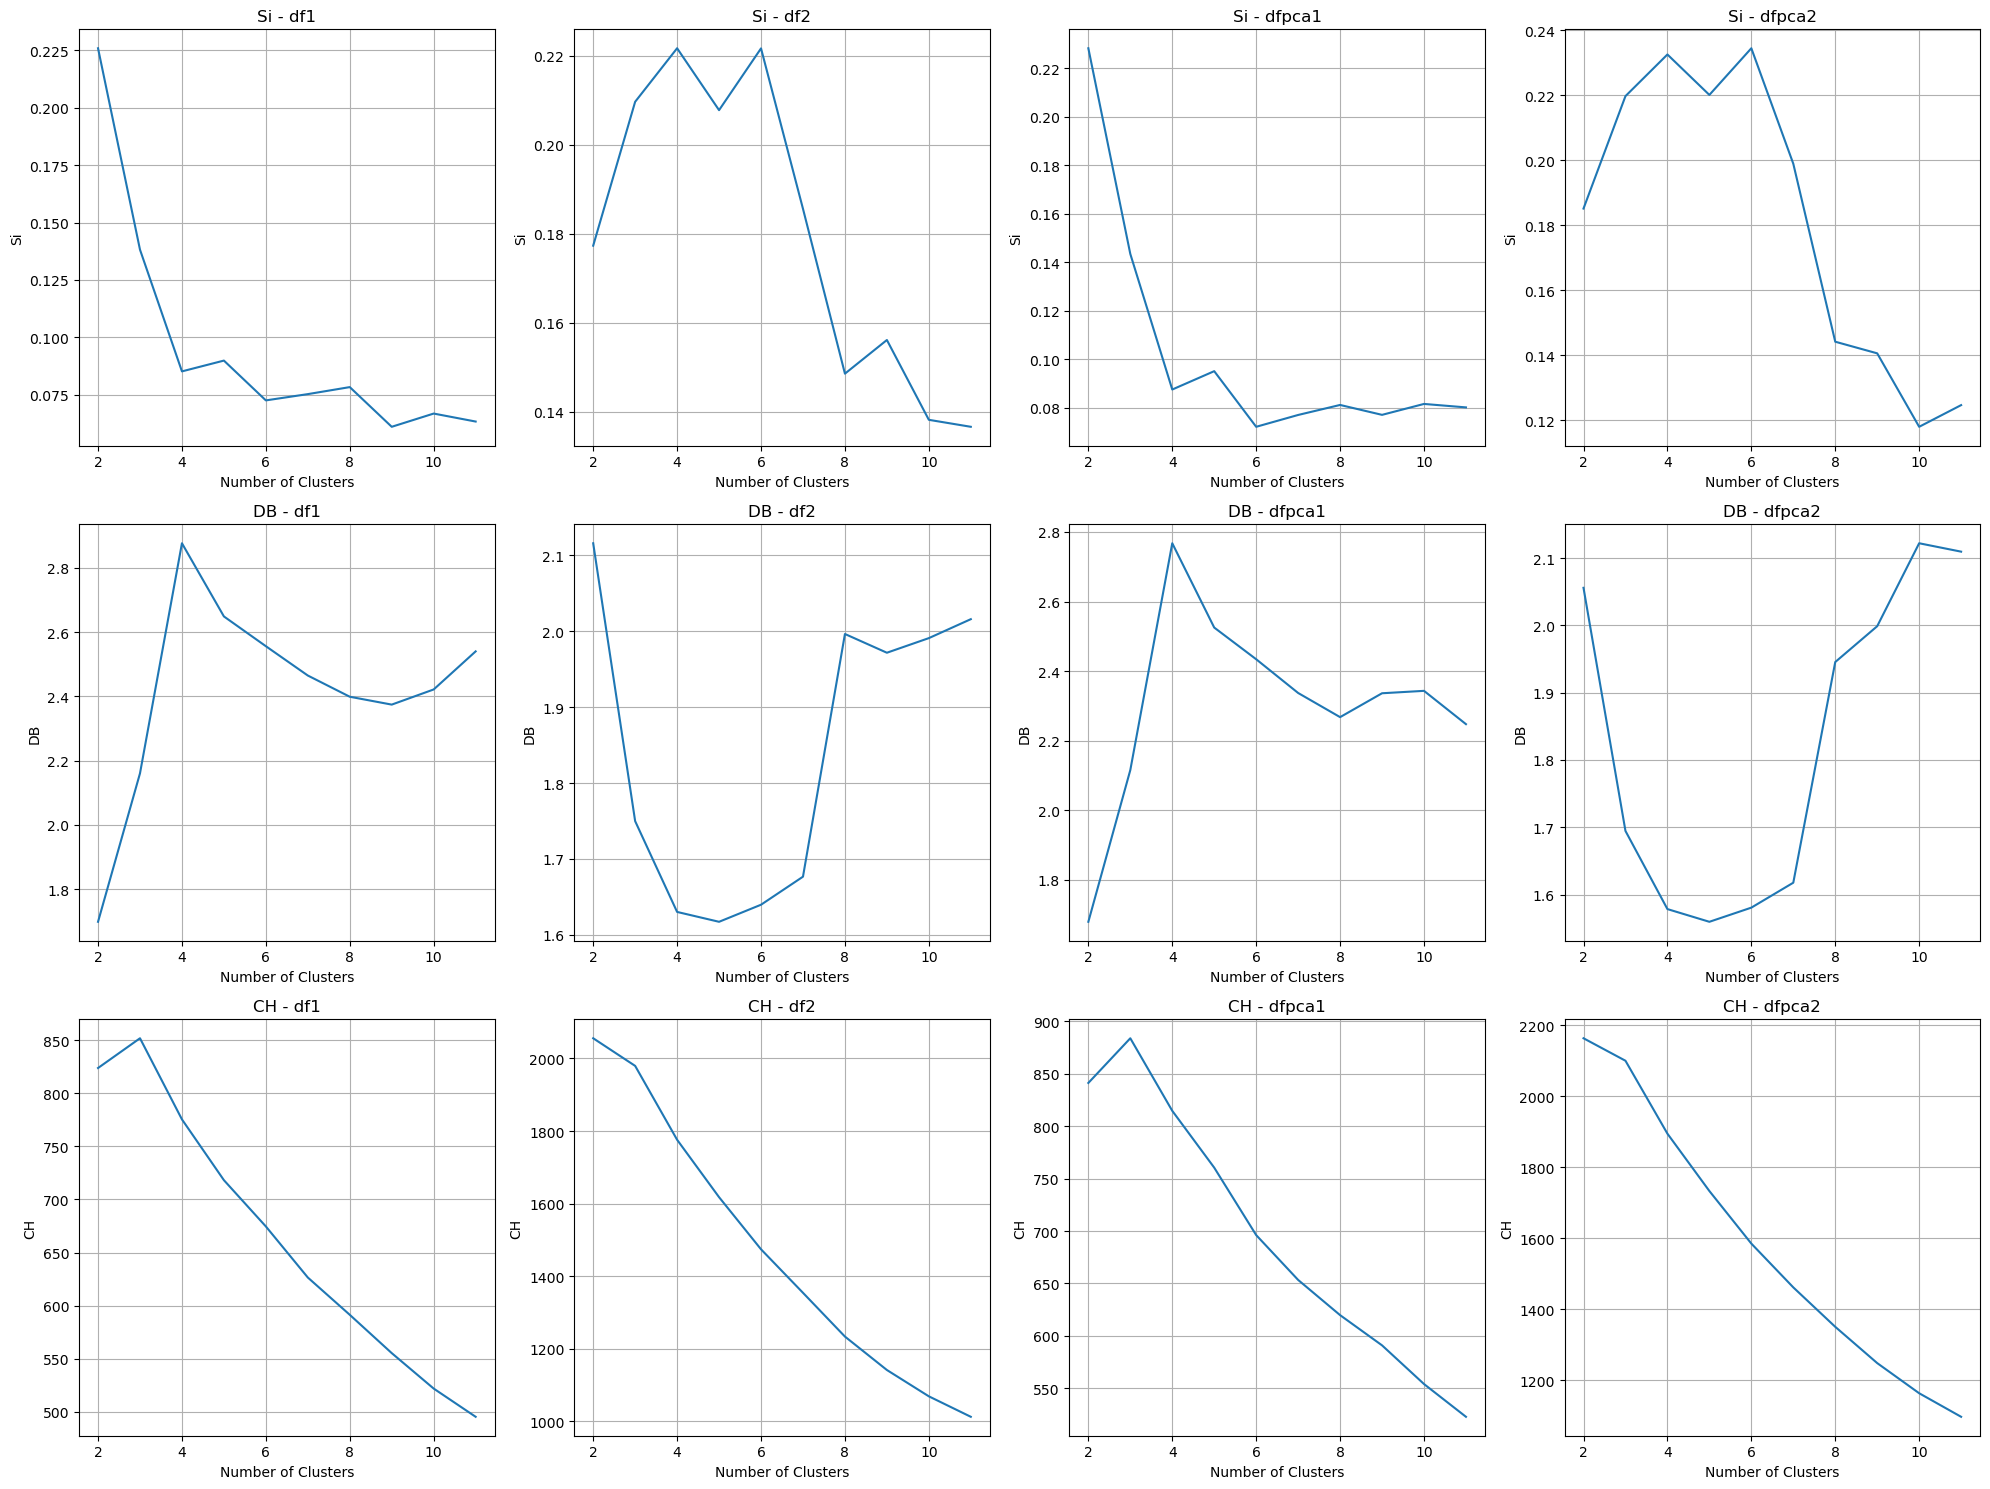

In [193]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
for idx, metric in enumerate(['Si', 'DB', 'CH']):
    for i, col in enumerate(['df1', 'df2', 'dfpca1', 'dfpca2']):
        ax = axes[idx, i]
        ax.plot(results_HC['Clusters'], results_HC[f'{metric}_{col}'])
        ax.set_title(f'{metric} - {col}')
        ax.set_xlabel('Number of Clusters')
        ax.set_ylabel(metric)
        ax.grid()
plt.tight_layout()
plt.show()

In [194]:
topResAgglomerative = pd.DataFrame(columns=['DataSet', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])
dfs = []
for i, col in enumerate(['df1', 'df2', 'dfpca1', 'dfpca2']):
    minDB = results_HC.loc[results_HC[f'DB_{col}'].idxmin()]
    maxSil = results_HC.loc[results_HC[f'Si_{col}'].idxmax()]
    maxCH = results_HC.loc[results_HC[f'CH_{col}'].idxmax()]
    df_row = pd.DataFrame({'DataSet': [col],
                    'Silhouette' : f"[{maxSil['Clusters']}]_{maxSil[f'Si_{col}']}",
                    'Davies-Bouldin': f"[{minDB['Clusters']}]_{minDB[f'DB_{col}']}",
                    'Calinski-Harabasz': f"[{maxCH['Clusters']}]_{maxCH[f'CH_{col}']}"
                    })
    dfs.append(df_row)
topResAgglomerative = pd.concat(dfs, ignore_index=True)
display(topResAgglomerative)

DataSet                 Silhouette            Davies-Bouldin  \
0     df1   [2.0]_0.2259446946130208  [2.0]_1.6979300121487764   
1     df2  [4.0]_0.22169044767359994  [5.0]_1.6171530644625864   
2  dfpca1  [2.0]_0.22828455193849398  [2.0]_1.6798350662389767   
3  dfpca2  [6.0]_0.23448518535590915  [5.0]_1.5595088750181882   

          Calinski-Harabasz  
0    [3.0]_851.689194583177  
1  [2.0]_2055.6532933001513  
2   [3.0]_883.8045183077539  
3  [2.0]_2163.0633199635813

In [195]:
print(df_2.shape)
pca_ac = PCA(n_components=13)
df_pca_ac = pca_ac.fit_transform(df_2)
print(df_pca_ac.shape)

(10127, 18)
(10127, 13)


In [196]:
cluster_number_ac = 6

0.23448518535590918


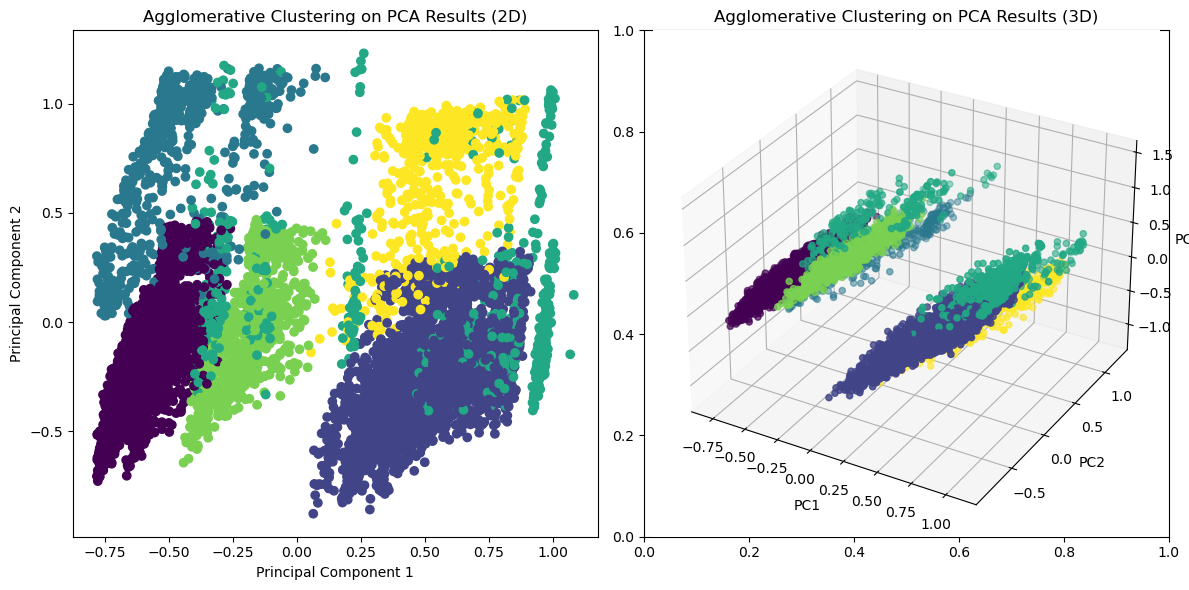

In [197]:
ac = AgglomerativeClustering(n_clusters=cluster_number_ac).fit(df_pca_ac)
labels = ac.labels_
print(silhouette_score(df_pca_ac, labels))
showPCAResults(df_pca_ac, labels, "Agglomerative")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Index(['Attrition_Flag', 'Gender', 'Income_Category', 'Card_Category',
       'Credit_Limit'],
      dtype='object')


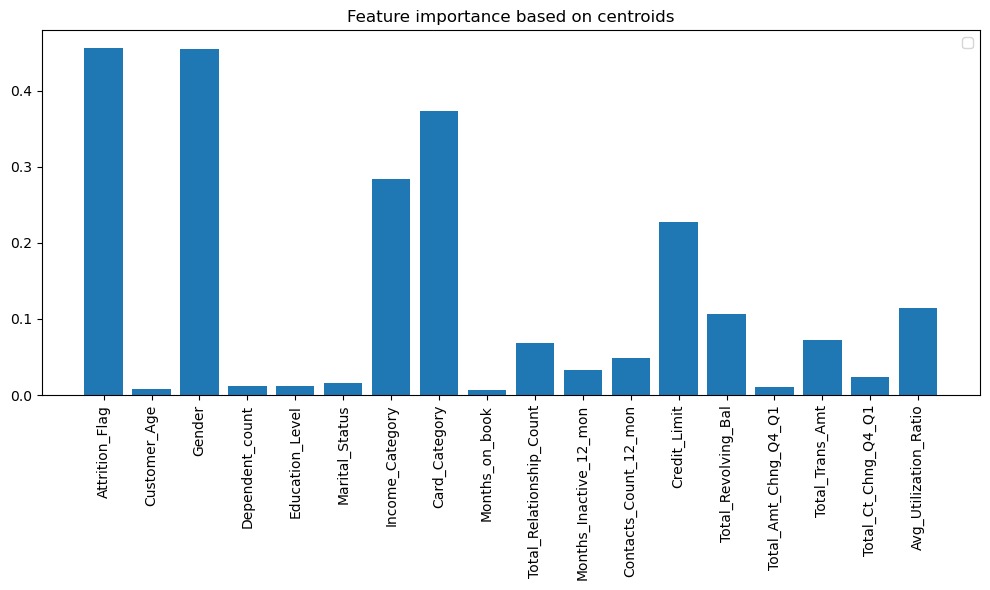

In [198]:
clusters = [df_2[labels == i] for i in range(cluster_number_ac)]
cluster_centers = [cluster.mean(axis=0) for cluster in clusters]
feature_importance = np.std(cluster_centers, axis=0)
showFeatureImportance(feature_importance)

important_columns = df.columns[feature_importance > 0.2]
print(important_columns)

In [199]:
cluster_data = np.array(
    [df_2[labels == i][important_columns].mean(axis=0) for i in range(cluster_number_ac)])
cluster_data_agglomerative = pd.DataFrame(
    cluster_data.T, columns=range(cluster_number_ac), index=important_columns)
cluster_data_agglomerative

0         1         2         3         4         5
Attrition_Flag   0.000000  0.000000  1.000000  0.156295  0.000000  1.000000
Gender           0.000000  1.000000  0.000000  0.628075  0.000000  1.000000
Income_Category  0.078732  0.474726  0.252060  0.428847  1.000000  0.498145
Card_Category    0.000000  0.000000  0.000000  1.000000  0.000000  0.000000
Credit_Limit     0.063026  0.287444  0.072482  0.741022  0.199727  0.290186

Klaster 0:
Attrition_Flag: Svi klijenti u ovom klasteru su zadržali usluge.
Gender: Svi klijenti su ženskog pola.
Income_Category: Ovaj klaster sadrži klijente sa veoma niskim prihodima.
Card_Category: Svi klijenti u ovom klasteru koriste Blue karticu.
Credit_Limit: Klijenti u ovom klasteru imaju niske vrednosti kreditnih limita.

Klaster 1:
Attrition_Flag: Svi klijenti u ovom klasteru su napustili usluge.
Gender: Svi klijenti su muškog pola.
Income_Category: Ovaj klaster sadrži klijente sa srednjim prihodima.
Card_Category: Svi klijenti u ovom klasteru koriste Platinum karticu.
Credit_Limit: Klijenti u ovom klasteru imaju visoke vrednosti kreditnih limita.

Klaster 2:
Attrition_Flag: Svi klijenti u ovom klasteru su napustili usluge.
Gender: Svi klijenti su ženskog pola.
Income_Category: Ovaj klaster sadrži klijente sa veoma niskim prihodima.
Card_Category: Svi klijenti u ovom klasteru koriste Blue karticu.
Credit_Limit: Klijenti u ovom klasteru imaju niske vrednosti kreditnih limita.

Klaster 3:
Attrition_Flag: Većina klijenata u ovom klasteru je zadržala usluge.
Gender: Većina klijenata je muškog pola.
Income_Category: Ovaj klaster sadrži klijente sa srednjim prihodima.
Card_Category: Svi klijenti u ovom klasteru koriste Gold karticu.
Credit_Limit: Klijenti u ovom klasteru imaju srednje vrednosti kreditnih limita.

Klaster 4:
Attrition_Flag: Svi klijenti u ovom klasteru su zadržali usluge.
Gender: Svi klijenti su muškog pola.
Income_Category: Ovaj klaster sadrži klijente sa visokim prihodima.
Card_Category: Svi klijenti u ovom klasteru koriste Blue karticu.
Credit_Limit: Klijenti u ovom klasteru imaju visoke vrednosti kreditnih limita.

Klaster 5:
Attrition_Flag: Svi klijenti u ovom klasteru su napustili usluge.
Gender: Svi klijenti su muškog pola.
Income_Category: Ovaj klaster sadrži klijente sa srednjim prihodima.
Card_Category: Svi klijenti u ovom klasteru koriste Blue karticu.
Credit_Limit: Klijenti u ovom klasteru imaju srednje vrednosti kreditnih limita.

In [200]:
df_2_reducted = df_2[important_columns]
labels_Agglomerative = AgglomerativeClustering(n_clusters=6).fit_predict(df_2_reducted)
df_row = pd.DataFrame({'Algorithm': ['Agglomerative'],
                    'DataSet': ['df_2_reducted'],
                    'ClusterNumber' : [6],
                    'Silhouette': [silhouette_score(df_2_reducted, labels_Agglomerative)]
                    })
allResults = pd.concat([allResults, df_row], ignore_index=True)
display(allResults)

Algorithm        DataSet ClusterNumber  Silhouette
0         KMeans  df_2_reducted             6    0.668626
1  Agglomerative  df_2_reducted             6    0.668226

In [201]:
cluster_data = np.array(
    [df_2_reducted[labels_Agglomerative == i][important_columns].mean(axis=0) for i in range(cluster_number_ac)])
cluster_data_Agglomerative_reducted = pd.DataFrame(
    cluster_data.T, columns=range(cluster_number_ac), index=important_columns)
cluster_data_Agglomerative_reducted

0         1         2         3         4         5
Attrition_Flag   0.000000  0.156295  0.000000  1.000000  0.000000  1.000000
Gender           1.000000  0.628075  0.000000  0.000000  0.000000  1.000000
Income_Category  0.474726  0.428847  0.078732  0.252060  1.000000  0.498145
Card_Category    0.000000  1.000000  0.000000  0.000000  0.000000  0.000000
Credit_Limit     0.287444  0.741022  0.063026  0.072482  0.199727  0.290186

In [202]:
results_GM = pd.DataFrame(columns=['Clusters', 'Si_df1', 'DB_df1', 'CH_df1', 'Si_df2', 'DB_df2', 'CH_df2',
                                'Si_dfpca1', 'DB_dfpca1', 'CH_dfpca1', 'Si_dfpca2', 'DB_dfpca2', 'CH_dfpca2'])
dfs = []
for i in range(2,12):
    model = GaussianMixture(n_components=i)
    labels_df1 = model.fit_predict(df_1)
    labels_df2 = model.fit_predict(df_2)
    labels_dfpca1 = model.fit_predict(df_pca1)
    labels_dfpca2 = model.fit_predict(df_pca2)
    df_row = pd.DataFrame({'Clusters': [i],
                    'Si_df1' : [silhouette_score(df_1, labels_df1)],
                    'DB_df1': [davies_bouldin_score(df_1, labels_df1)],
                    'CH_df1': [calinski_harabasz_score(df_1, labels_df1)],

                    'Si_df2' : [silhouette_score(df_2, labels_df2)],
                    'DB_df2': [davies_bouldin_score(df_2, labels_df2)],
                    'CH_df2': [calinski_harabasz_score(df_2, labels_df2)],
                    
                    'Si_dfpca1' : [silhouette_score(df_pca1, labels_dfpca1)],
                    'DB_dfpca1': [davies_bouldin_score(df_pca1, labels_dfpca1)],
                    'CH_dfpca1': [calinski_harabasz_score(df_pca1, labels_dfpca1)],
                    
                    'Si_dfpca2' : [silhouette_score(df_pca2, labels_dfpca2)],
                    'DB_dfpca2': [davies_bouldin_score(df_pca2, labels_dfpca2)],
                    'CH_dfpca2': [calinski_harabasz_score(df_pca2, labels_dfpca2)]
                    })
    dfs.append(df_row)
results_GM = pd.concat(dfs, ignore_index=True)
display(results_GM)

Clusters    Si_df1    DB_df1      CH_df1    Si_df2    DB_df2       CH_df2  \
0         2  0.183806  2.350069  833.714408  0.214255  1.844735  2779.744646   
1         3  0.088108  2.871285  832.686466  0.218700  1.701543  2135.131168   
2         4  0.087705  2.804099  802.844376  0.201193  1.857518  1748.049071   
3         5  0.063733  3.667956  680.661123  0.207773  1.617153  1617.603040   
4         6  0.096212  2.927788  630.063831  0.136272  2.237086  1230.639614   
5         7  0.052704  3.766474  573.595273  0.165173  2.042744  1289.259205   
6         8  0.092306  2.510020  559.034791  0.136674  2.170564  1154.803033   
7         9  0.059371  3.545175  501.860736  0.113263  2.193184  1061.849304   
8        10  0.064084  2.724727  480.695138  0.123248  2.153412  1087.234467   
9        11  0.072648  2.609717  458.069737  0.105159  2.506880   989.381416   

   Si_dfpca1  DB_dfpca1   CH_dfpca1  Si_dfpca2  DB_dfpca2    CH_dfpca2  
0   0.118822   3.244479  791.382609   0.223752   1.790311  2935.769507  
1   0.131345   2.695876  779.062047   0.200877   2.268680  1834.319381  
2   0.099149   2.750217  825.813160   0.232567   1.578390  1894.595935  
3   0.106185   2.589156  791.751651   0.159700   2.411477  1482.138144  
4   0.069544   3.327241  669.692070   0.162855   1.948794  1498.859576  
5   0.087856   2.720424  649.433128   0.183577   1.858811  1422.052320  
6   0.056534   3.409655  570.924386   0.133803   2.121582  1350.313183  
7   0.052981   3.428323  505.539482   0.108790   2.460833  1183.948793  
8   0.070866   2.711951  506.222814   0.120731   2.287975  1146.560658  
9   0.075898   2.841341  479.877879   0.101246   2.651080  1069.144135

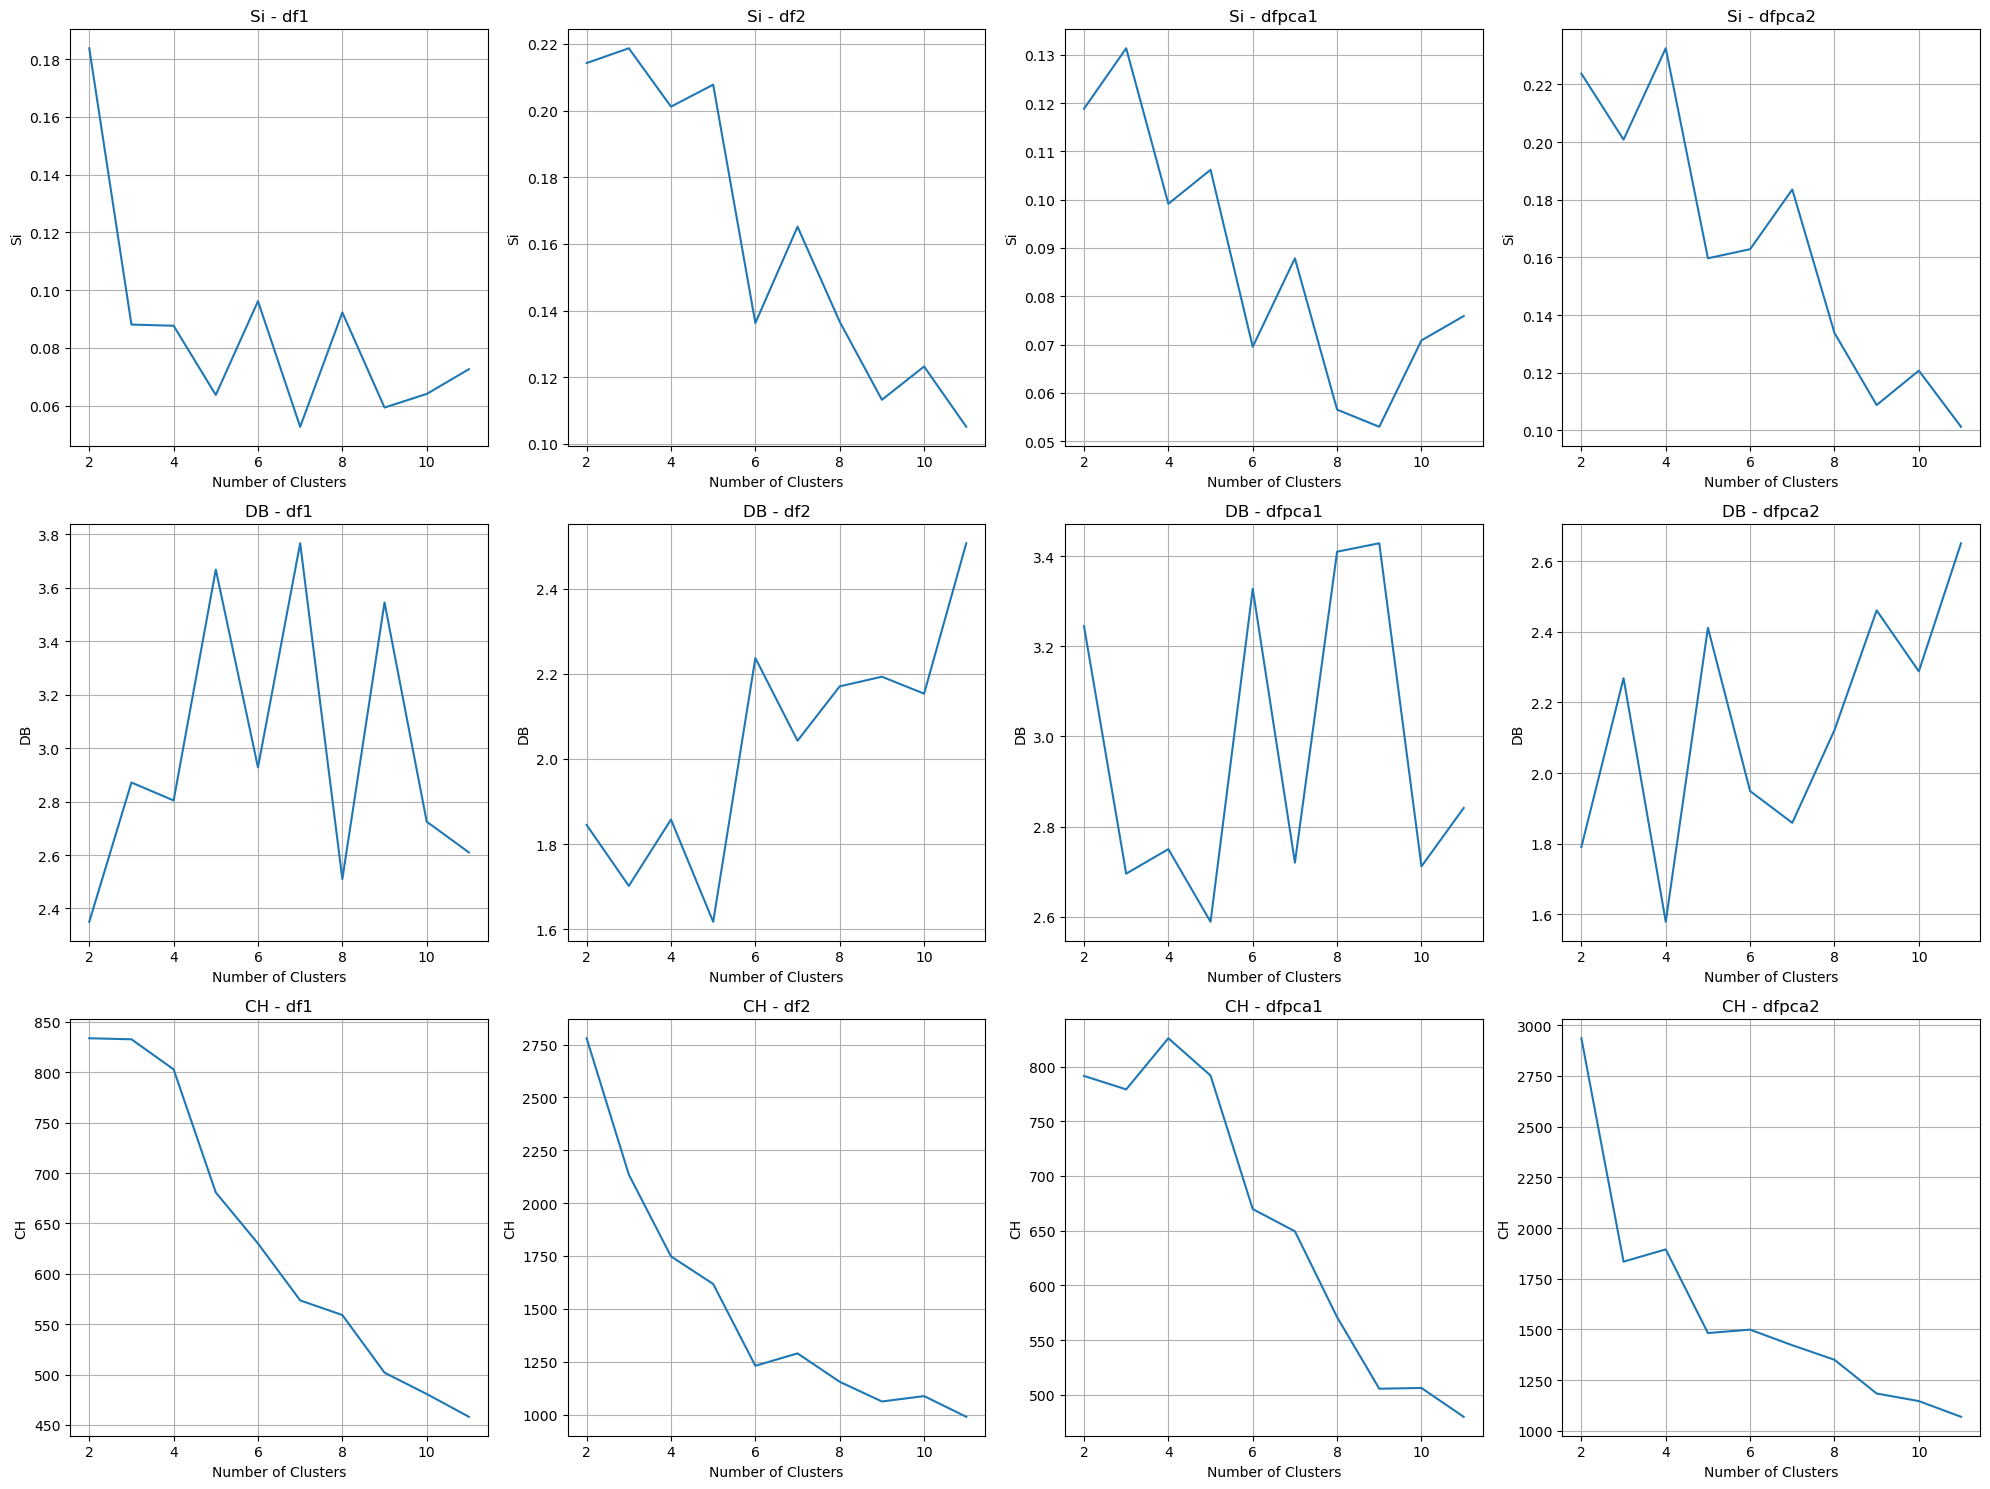

In [203]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
for idx, metric in enumerate(['Si', 'DB', 'CH']):
    for i, col in enumerate(['df1', 'df2', 'dfpca1', 'dfpca2']):
        ax = axes[idx, i]
        ax.plot(results_GM['Clusters'], results_GM[f'{metric}_{col}'])
        ax.set_title(f'{metric} - {col}')
        ax.set_xlabel('Number of Clusters')
        ax.set_ylabel(metric)
        ax.grid()
plt.tight_layout()
plt.show()

In [204]:
topResGaussian = pd.DataFrame(columns=['DataSet', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])
dfs = []
for i, col in enumerate(['df1', 'df2', 'dfpca1', 'dfpca2']):
    minDB = results_GM.loc[results_GM[f'DB_{col}'].idxmin()]
    maxSil = results_GM.loc[results_GM[f'Si_{col}'].idxmax()]
    maxCH = results_GM.loc[results_GM[f'CH_{col}'].idxmax()]
    df_row = pd.DataFrame({'DataSet': [col],
                    'Silhouette' : f"[{maxSil['Clusters']}]_{maxSil[f'Si_{col}']}",
                    'Davies-Bouldin': f"[{minDB['Clusters']}]_{minDB[f'DB_{col}']}",
                    'Calinski-Harabasz': f"[{maxCH['Clusters']}]_{maxCH[f'CH_{col}']}"
                    })
    dfs.append(df_row)
topResGaussian = pd.concat(dfs, ignore_index=True)
display(topResGaussian)

DataSet                 Silhouette            Davies-Bouldin  \
0     df1   [2.0]_0.1838058422586625  [2.0]_2.3500686927127012   
1     df2   [3.0]_0.2186997385707705  [5.0]_1.6171530644625864   
2  dfpca1  [3.0]_0.13134476463904102  [5.0]_2.5891560327287064   
3  dfpca2   [4.0]_0.2325674715894426  [4.0]_1.5783901682338788   

          Calinski-Harabasz  
0   [2.0]_833.7144079079654  
1  [2.0]_2779.7446460048986  
2   [4.0]_825.8131597995853  
3  [2.0]_2935.7695071639146

In [205]:
print(df_2.shape)
pca_gm = PCA(n_components=13)
df_pca_gm = pca_gm.fit_transform(df_2)
print(df_pca_gm.shape)

(10127, 18)
(10127, 13)


In [206]:
cluster_number_gm = 3

0.22922629305862086


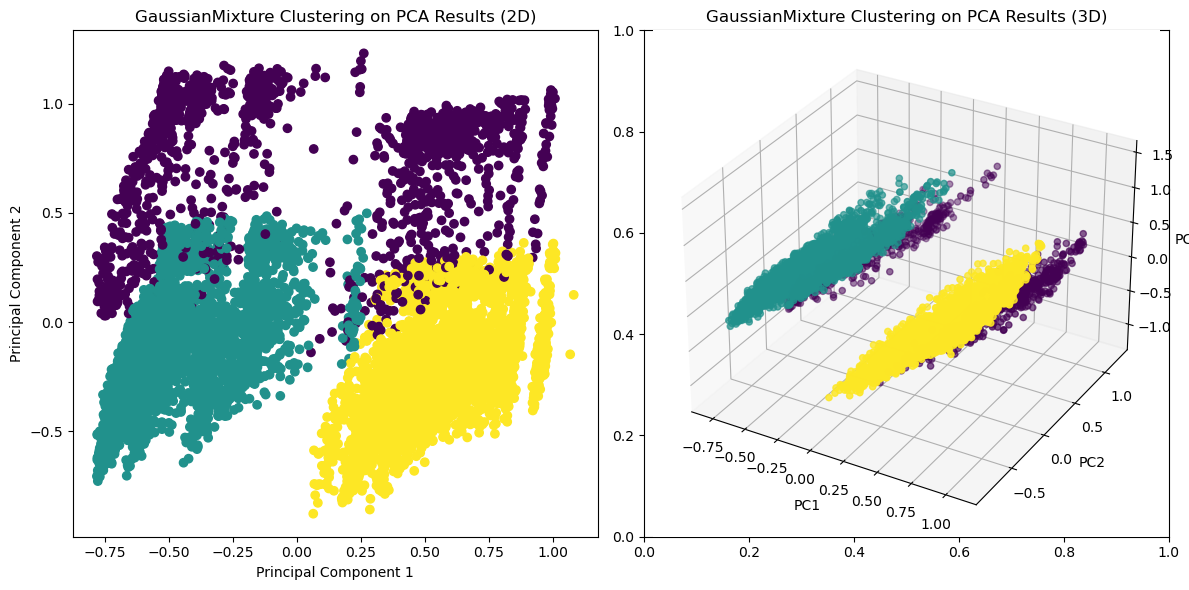

In [207]:
labels = GaussianMixture(n_components=cluster_number_gm).fit_predict(df_pca_gm)
print(silhouette_score(df_pca_gm, labels))
showPCAResults(df_pca_gm, labels, "GaussianMixture")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Index(['Attrition_Flag', 'Gender', 'Total_Revolving_Bal'], dtype='object')


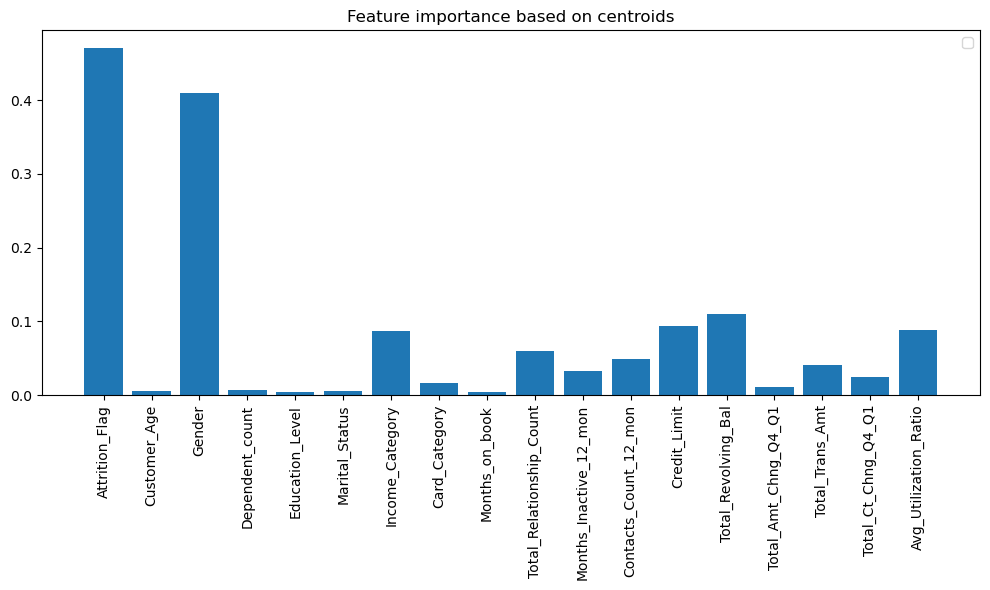

In [208]:
clusters = [df_2[labels == i] for i in range(cluster_number_gm)]
cluster_centers = [cluster.mean(axis=0) for cluster in clusters]
feature_importance = np.std(cluster_centers, axis=0)
showFeatureImportance(feature_importance)

important_columns = df.columns[feature_importance > 0.1]
print(important_columns)

In [209]:
cluster_data = np.array(
    [df_2[km.labels_ == i][important_columns].mean(axis=0) for i in range(cluster_number_gm)])
cluster_data_gaussian = pd.DataFrame(
    cluster_data.T, columns=range(cluster_number_gm), index=important_columns)
cluster_data_gaussian

0         1        2
Attrition_Flag       0.000000  0.000000  1.00000
Gender               1.000000  0.000000  0.00000
Total_Revolving_Bal  0.504843  0.495718  0.26445

Klaster 0:
Attrition_Flag: Svi klijenti u ovom klasteru su zadržali usluge.
Gender: Svi klijenti su ženskog pola.
Income_Category: Ovaj klaster sadrži klijente sa veoma niskim prihodima.
Card_Category: Većina klijenata u ovom klasteru koristi Blue karticu.
Credit_Limit: Klijenti u ovom klasteru imaju niske vrednosti kreditnih limita.
Avg_Utilization_Ratio: Klijenti u ovom klasteru imaju niske prosečne vrednosti odnosa iskorišćenosti kreditnog limita.

Klaster 1:
Attrition_Flag: Svi klijenti u ovom klasteru su napustili usluge.
Gender: Svi klijenti su muškog pola.
Income_Category: Ovaj klaster sadrži klijente sa srednjim prihodima.
Card_Category: Većina klijenata u ovom klasteru koristi Blue karticu.
Credit_Limit: Klijenti u ovom klasteru imaju srednje vrednosti kreditnih limita.
Avg_Utilization_Ratio: Klijenti u ovom klasteru imaju srednje prosečne vrednosti odnosa iskorišćenosti kreditnog limita.

Klaster 2:
Attrition_Flag: Svi klijenti u ovom klasteru su napustili usluge.
Gender: Većina klijenata je muškog pola.
Income_Category: Ovaj klaster sadrži klijente sa veoma niskim prihodima.
Card_Category: Većina klijenata u ovom klasteru koristi Blue karticu.
Credit_Limit: Klijenti u ovom klasteru imaju niske vrednosti kreditnih limita.
Avg_Utilization_Ratio: Klijenti u ovom klasteru imaju visoke prosečne vrednosti odnosa iskorišćenosti kreditnog limita.

In [210]:
df_2_reducted = df_2[important_columns]
labels_gm = GaussianMixture(n_components=cluster_number_gm).fit_predict(df_2_reducted)
df_row = pd.DataFrame({'Algorithm': ['Gaussian'],
                    'DataSet': ['df_2_reducted'],
                    'ClusterNumber' : [3],
                    'Silhouette': [silhouette_score(df_2_reducted, labels_gm)]
                    })
allResults = pd.concat([allResults, df_row], ignore_index=True)
display(allResults)

Algorithm        DataSet ClusterNumber  Silhouette
0         KMeans  df_2_reducted             6    0.668626
1  Agglomerative  df_2_reducted             6    0.668226
2       Gaussian  df_2_reducted             3    0.633486

In [211]:
cluster_data = np.array(
    [df_2[labels_gm == i][important_columns].mean(axis=0) for i in range(cluster_number_gm)])
cluster_data_Gaussian_reducted = pd.DataFrame(
    cluster_data.T, columns=range(cluster_number_gm), index=important_columns)
cluster_data_Gaussian_reducted

0         1         2
Attrition_Flag       0.000000  0.000000  1.000000
Gender               1.000000  0.000000  0.428396
Total_Revolving_Bal  0.506717  0.492377  0.267311

In [212]:
results_Birsch = pd.DataFrame(columns=['Clusters', 'Si_df1', 'DB_df1', 'CH_df1', 'Si_df2', 'DB_df2', 'CH_df2',
                                'Si_dfpca1', 'DB_dfpca1', 'CH_dfpca1', 'Si_dfpca2', 'DB_dfpca2', 'CH_dfpca2'])
dfs = []
for i in range(2,12):
    model = Birch(n_clusters=i)
    labels_df1 = model.fit_predict(df_1)
    labels_df2 = model.fit_predict(df_2)
    labels_dfpca1 = model.fit_predict(df_pca1)
    labels_dfpca2 = model.fit_predict(df_pca2)
    df_row = pd.DataFrame({'Clusters': [i],
                    'Si_df1' : [silhouette_score(df_1, labels_df1)],
                    'DB_df1': [davies_bouldin_score(df_1, labels_df1)],
                    'CH_df1': [calinski_harabasz_score(df_1, labels_df1)],

                    'Si_df2' : [silhouette_score(df_2, labels_df2)],
                    'DB_df2': [davies_bouldin_score(df_2, labels_df2)],
                    'CH_df2': [calinski_harabasz_score(df_2, labels_df2)],
                    
                    'Si_dfpca1' : [silhouette_score(df_pca1, labels_dfpca1)],
                    'DB_dfpca1': [davies_bouldin_score(df_pca1, labels_dfpca1)],
                    'CH_dfpca1': [calinski_harabasz_score(df_pca1, labels_dfpca1)],
                    
                    'Si_dfpca2' : [silhouette_score(df_pca2, labels_dfpca2)],
                    'DB_dfpca2': [davies_bouldin_score(df_pca2, labels_dfpca2)],
                    'CH_dfpca2': [calinski_harabasz_score(df_pca2, labels_dfpca2)]
                    })
    dfs.append(df_row)
results_Birsch = pd.concat(dfs, ignore_index=True)
display(results_Birsch)

Clusters    Si_df1    DB_df1      CH_df1    Si_df2    DB_df2       CH_df2  \
0         2  0.225945  1.697930  823.682895  0.177303  2.115715  2055.893714   
1         3  0.138684  2.161732  852.747098  0.209684  1.749641  1979.764795   
2         4  0.086714  2.776410  794.742429  0.221677  1.630104  1775.533815   
3         5  0.092736  2.588979  739.183271  0.207911  1.617272  1617.599507   
4         6  0.089850  2.499512  669.344232  0.221781  1.639869  1473.930791   
5         7  0.068499  2.474162  620.520880  0.226487  1.678580  1299.875274   
6         8  0.071596  2.380775  585.770976  0.172541  2.086587  1195.401545   
7         9  0.064563  2.507862  553.722666  0.172199  2.055099  1084.850708   
8        10  0.055647  2.361595  523.142824  0.172593  1.985934   983.149846   
9        11  0.061137  2.380808  495.869762  0.174426  1.929840   900.069705   

   Si_dfpca1  DB_dfpca1   CH_dfpca1  Si_dfpca2  DB_dfpca2    CH_dfpca2  
0   0.227777   1.679091  835.982707   0.218007   1.732842   800.929319  
1   0.143168   2.115675  880.866120   0.205242   1.805237  1159.290458  
2   0.082539   2.729098  804.931962   0.232567   1.578390  1894.595935  
3   0.091239   2.541037  759.773913   0.237111   1.583421  1633.365489  
4   0.075389   2.499181  700.354828   0.234342   1.581789  1584.757356  
5   0.081409   2.400455  649.481059   0.239113   1.618444  1398.958774  
6   0.082287   2.219323  607.531831   0.238982   1.634982  1245.876624  
7   0.078959   2.217884  572.451276   0.236914   1.593786  1112.124423  
8   0.073059   2.278234  544.088336   0.182302   1.977745  1043.722581  
9   0.077681   2.297276  516.175180   0.171155   1.903572   984.357755

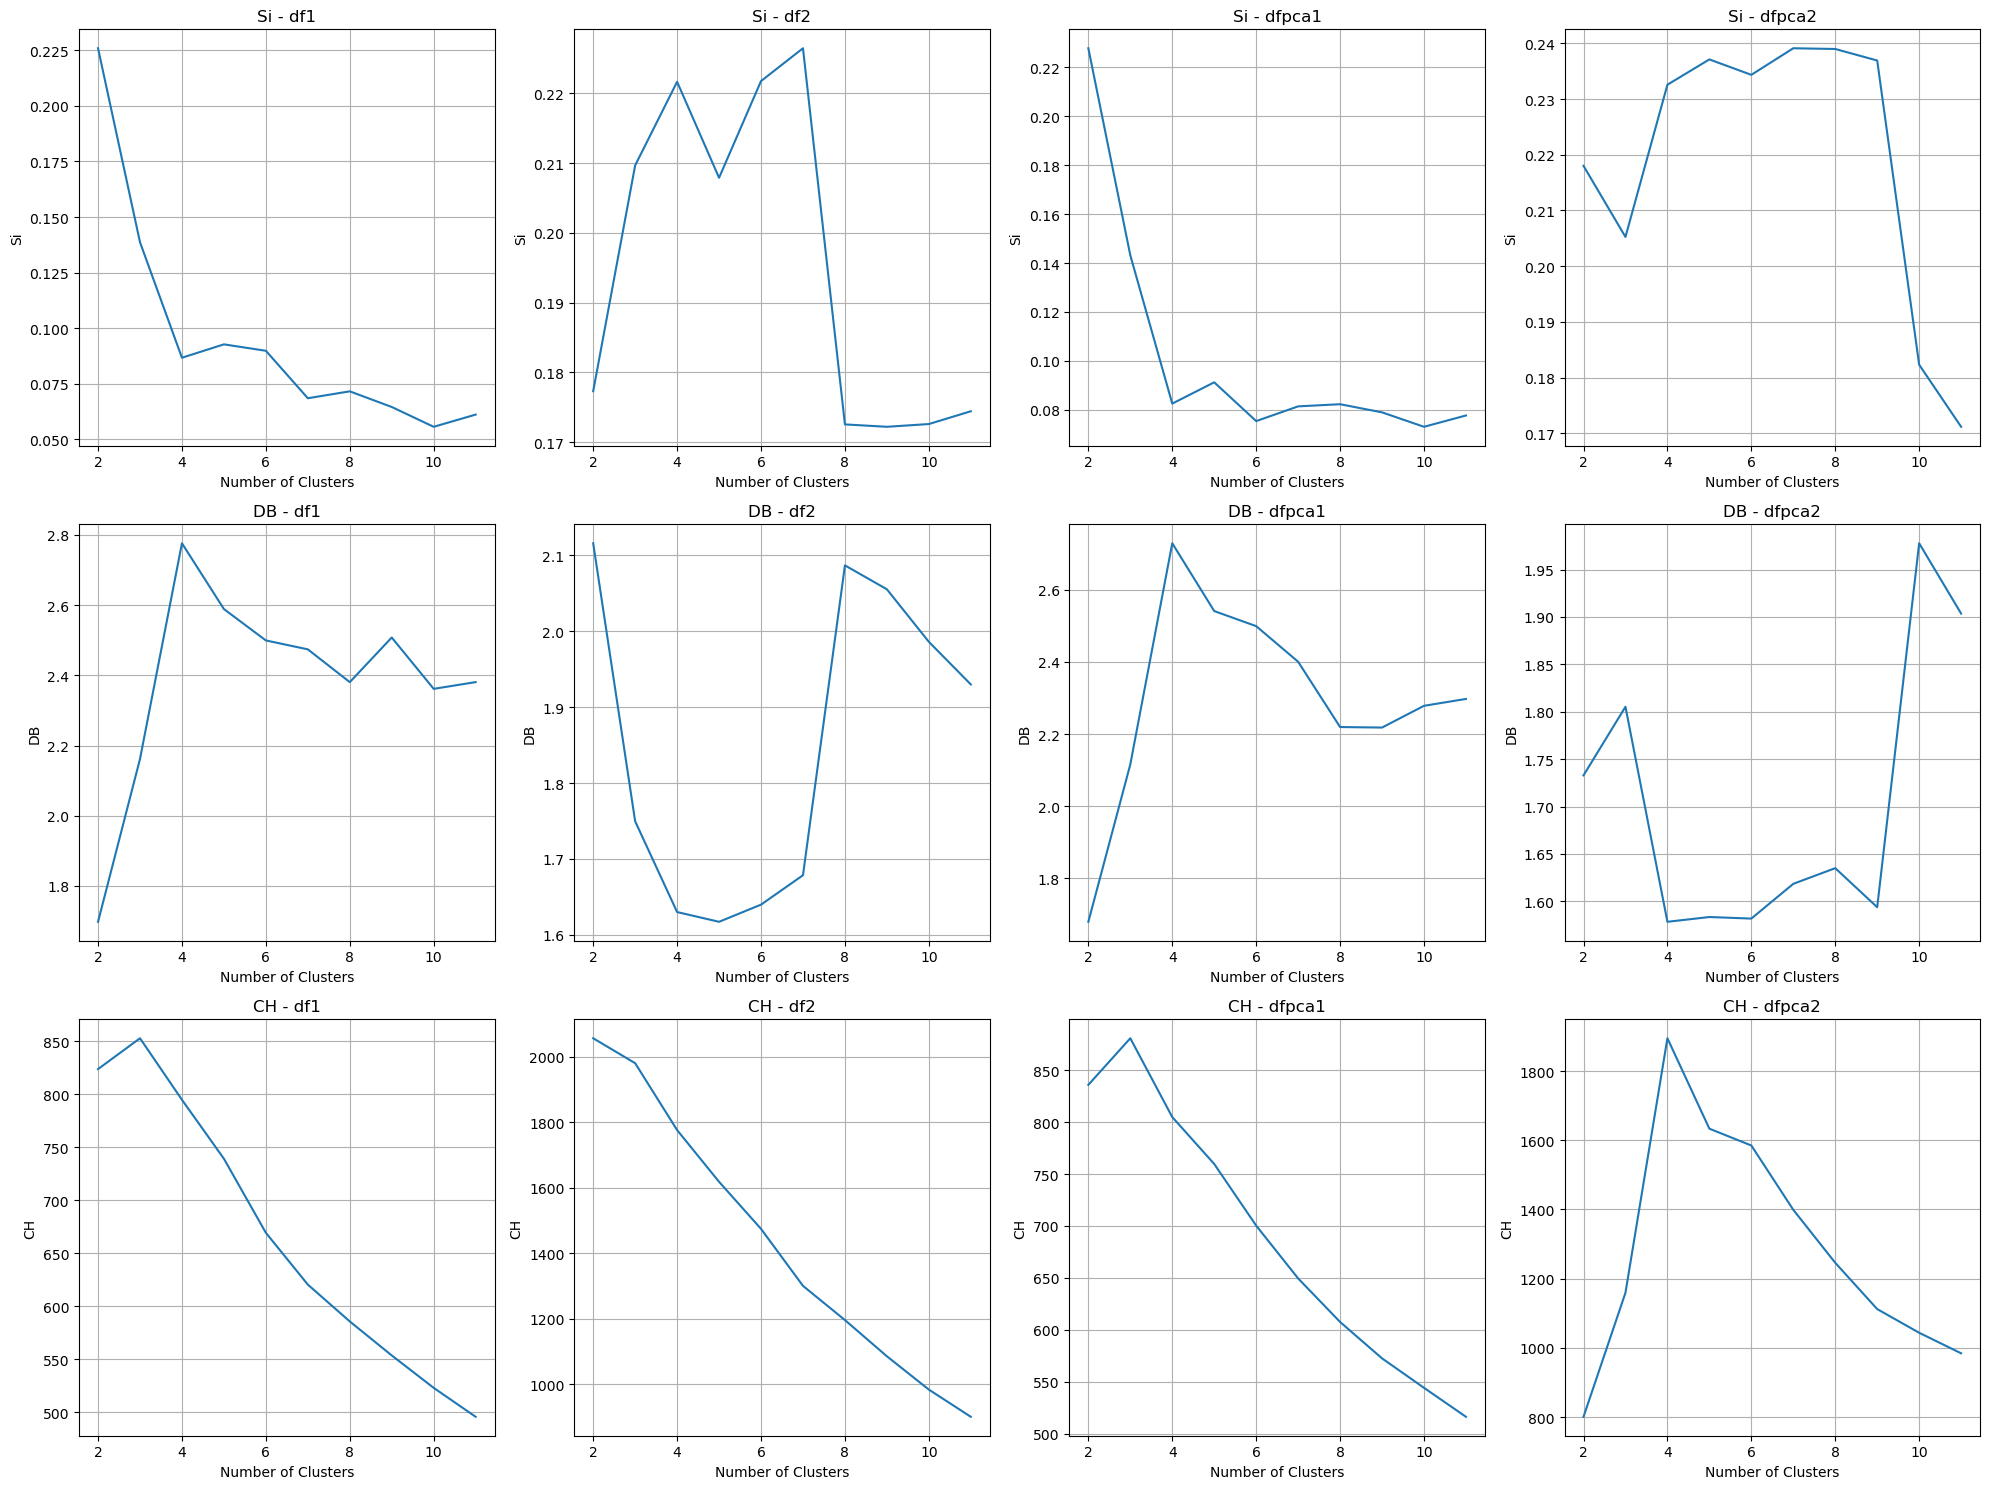

In [213]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
for idx, metric in enumerate(['Si', 'DB', 'CH']):
    for i, col in enumerate(['df1', 'df2', 'dfpca1', 'dfpca2']):
        ax = axes[idx, i]
        ax.plot(results_Birsch['Clusters'], results_Birsch[f'{metric}_{col}'])
        ax.set_title(f'{metric} - {col}')
        ax.set_xlabel('Number of Clusters')
        ax.set_ylabel(metric)
        ax.grid()
plt.tight_layout()
plt.show()

In [214]:
topResBirch = pd.DataFrame(columns=['DataSet', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])
dfs = []
for i, col in enumerate(['df1', 'df2', 'dfpca1', 'dfpca2']):
    minDB = results_Birsch.loc[results_Birsch[f'DB_{col}'].idxmin()]
    maxSil = results_Birsch.loc[results_Birsch[f'Si_{col}'].idxmax()]
    maxCH = results_Birsch.loc[results_Birsch[f'CH_{col}'].idxmax()]
    df_row = pd.DataFrame({'DataSet': [col],
                    'Silhouette' : f"[{maxSil['Clusters']}]_{maxSil[f'Si_{col}']}",
                    'Davies-Bouldin': f"[{minDB['Clusters']}]_{minDB[f'DB_{col}']}",
                    'Calinski-Harabasz': f"[{maxCH['Clusters']}]_{maxCH[f'CH_{col}']}"
                    })
    dfs.append(df_row)
topResBirch = pd.concat(dfs, ignore_index=True)
display(topResBirch)

DataSet                 Silhouette            Davies-Bouldin  \
0     df1   [2.0]_0.2259446946130208  [2.0]_1.6979300121487764   
1     df2  [7.0]_0.22648665928230652  [5.0]_1.6172719487388676   
2  dfpca1  [2.0]_0.22777687687274178  [2.0]_1.6790907323035298   
3  dfpca2  [7.0]_0.23911328461334597  [4.0]_1.5783901682338786   

          Calinski-Harabasz  
0   [3.0]_852.7470980076129  
1  [2.0]_2055.8937136380027  
2   [3.0]_880.8661203468529  
3   [4.0]_1894.595935074998

In [215]:
print(df_2.shape)
pca_b = PCA(n_components=13)
df_pca_b = pca_b.fit_transform(df_2)
print(df_pca_b.shape)

(10127, 18)
(10127, 13)


In [216]:
cluster_number_b = 4

0.23256747158944252


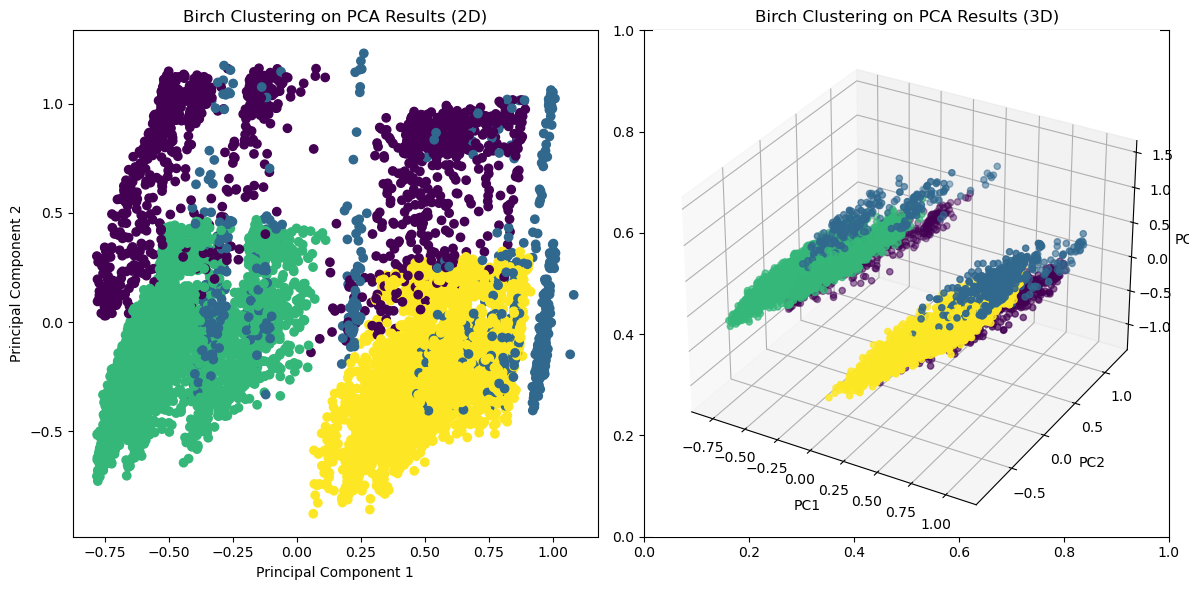

In [217]:
labels = Birch(n_clusters=cluster_number_b).fit_predict(df_pca_b)
print(silhouette_score(df_pca_b, labels))
showPCAResults(df_pca_b, labels, "Birch")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Index(['Attrition_Flag', 'Gender', 'Card_Category', 'Credit_Limit'], dtype='object')


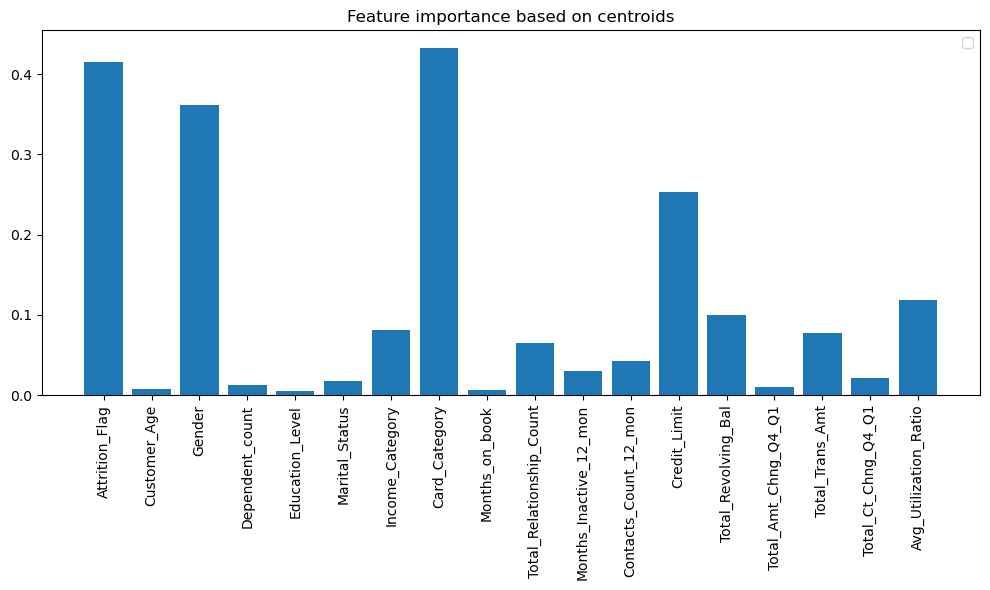

In [218]:
clusters = [df_2[labels == i] for i in range(cluster_number_b)]
cluster_centers = [cluster.mean(axis=0) for cluster in clusters]
feature_importance = np.std(cluster_centers, axis=0)
showFeatureImportance(feature_importance)

important_columns = df.columns[feature_importance > 0.2]
print(important_columns)

In [219]:
cluster_data = np.array(
    [df_2[labels == i][important_columns].mean(axis=0) for i in range(cluster_number_b)])
cluster_data_birch = pd.DataFrame(
    cluster_data.T, columns=range(cluster_number_b), index=important_columns)
cluster_data_birch

0         1         2         3
Attrition_Flag  1.000000  0.156295  0.000000  0.000000
Gender          0.414088  0.628075  0.000000  1.000000
Card_Category   0.000000  1.000000  0.000000  0.000000
Credit_Limit    0.162631  0.741022  0.089776  0.287444

Klaster 0:
Attrition_Flag: Svi klijenti u ovom klasteru su zadržali usluge.
Gender: Većina klijenata u ovom klasteru je ženskog pola.
Card_Category: Većina klijenata u ovom klasteru koristi Blue karticu.
Credit_Limit: Klijenti u ovom klasteru imaju niske do srednje vrednosti kreditnih limita.

Klaster 1:
Attrition_Flag: Većina klijenata u ovom klasteru je zadržala usluge.
Gender: Većina klijenata u ovom klasteru je muškog pola.
Card_Category: Svi klijenti u ovom klasteru koriste Platinum karticu.
Credit_Limit: Klijenti u ovom klasteru imaju visoke vrednosti kreditnih limita.

Klaster 2:
Attrition_Flag: Svi klijenti u ovom klasteru su zadržali usluge.
Gender: Svi klijenti su ženskog pola.
Card_Category: Većina klijenata u ovom klasteru koristi Blue karticu.
Credit_Limit: Klijenti u ovom klasteru imaju niske do srednje vrednosti kreditnih limita.

Klaster 3:
Attrition_Flag: Svi klijenti u ovom klasteru su zadržali usluge.
Gender: Svi klijenti su muškog pola.
Card_Category: Svi klijenti u ovom klasteru koriste Silver karticu.
Credit_Limit: Klijenti u ovom klasteru imaju niske vrednosti kreditnih limita.

In [220]:
df_2_reducted = df_2[important_columns]
labels_birch = Birch(n_clusters=cluster_number_b).fit_predict(df_2_reducted)
df_row = pd.DataFrame({'Algorithm': ['Birch'],
                    'DataSet': ['df_2_reducted'],
                    'ClusterNumber' : [cluster_number_b],
                    'Silhouette': [silhouette_score(df_2_reducted, labels_birch)]
                    })
allResults = pd.concat([allResults, df_row], ignore_index=True)
display(allResults)

Algorithm        DataSet ClusterNumber  Silhouette
0         KMeans  df_2_reducted             6    0.668626
1  Agglomerative  df_2_reducted             6    0.668226
2       Gaussian  df_2_reducted             3    0.633486
3          Birch  df_2_reducted             4    0.641978

In [221]:
cluster_data = np.array(
    [df_2[labels_birch == i][important_columns].mean(axis=0) for i in range(cluster_number_b)])
cluster_data_Birch_reducted = pd.DataFrame(
    cluster_data.T, columns=range(cluster_number_b), index=important_columns)
cluster_data_Birch_reducted

0         1         2         3
Attrition_Flag  0.155642  0.174476  0.156682  0.145098
Gender          0.000000  0.000000  1.000000  1.000000
Card_Category   1.000000  0.000000  1.000000  0.000000
Credit_Limit    0.537907  0.086758  0.861299  0.287842

In [222]:
print("K-means")
display(cluster_data_kmeans_reducted)
print("Agglomerative")
display(cluster_data_Agglomerative_reducted)

K-means


0         1         2         3         4         5
Attrition_Flag   0.000000  0.000000  1.000000  0.000000  1.000000  0.118182
Gender           1.000000  0.000000  0.000000  0.000000  1.000000  0.653030
Income_Category  0.474726  0.078732  0.246092  1.000000  0.495781  0.445455
Card_Category    0.000000  0.000000  0.029444  0.001212  0.004747  1.000000
Credit_Limit     0.287444  0.063026  0.081008  0.199706  0.290286  0.759324

Agglomerative


0         1         2         3         4         5
Attrition_Flag   0.000000  0.156295  0.000000  1.000000  0.000000  1.000000
Gender           1.000000  0.628075  0.000000  0.000000  0.000000  1.000000
Income_Category  0.474726  0.428847  0.078732  0.252060  1.000000  0.498145
Card_Category    0.000000  1.000000  0.000000  0.000000  0.000000  0.000000
Credit_Limit     0.287444  0.741022  0.063026  0.072482  0.199727  0.290186

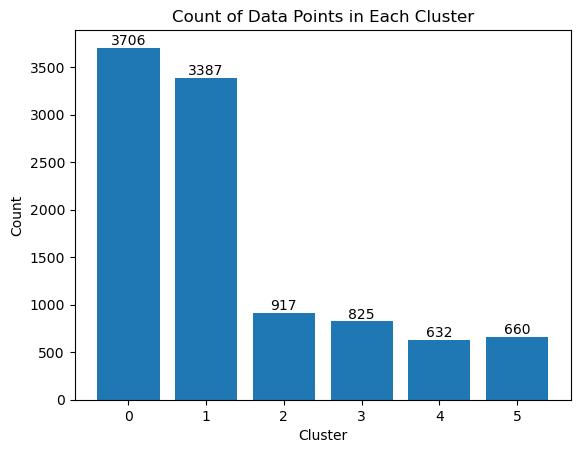

In [223]:
df['Cluster'] = labels_kmeans
df_start['Cluster'] = labels_kmeans
cluster_counts = df_start['Cluster'].value_counts()
cluster_counts = cluster_counts.sort_index()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Data Points in Each Cluster')
for i, count in enumerate(cluster_counts.values):
    plt.text(cluster_counts.index[i], count + 0.1, str(count), ha='center', va='bottom')
plt.show()

In [224]:
cat_features = ['Attrition_Flag', 'Gender','Income_Category', 'Card_Category']
group_names = {
    'Gender': {0: 'Male', 1: 'Female'},
    'Marital_Status': {0: 'Single', 1: 'Married', 2: 'Divorced'},
    'Income_Category': {0: 'Less than $40K', 1: '$40K - $80K', 2: '$80K+', 3: 'Unknown'},
    'Card_Category': {0: 'Blue', 1: 'Gold'},
    'Attrition_Flag': {0: 'Existing Customer', 1: 'Attrited Customer'}
}

results = {}

for cluster in df_start['Cluster'].unique():
    cluster_results = {}
    
    for feature in cat_features:
        feature_counts = df_start[df_start['Cluster'] == cluster][feature].map(group_names[feature]).value_counts()
        for value, count in feature_counts.items():
            group_name = group_names.get(feature, {}).get(value, value)

        cluster_results[feature] = feature_counts.to_dict()
        
    results[f'Cluster {cluster}'] = cluster_results

df_results = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)
display(df_results.T)

Attrition_Flag  \
Cluster 0                          {'Existing Customer': 3706}   
Cluster 1                          {'Existing Customer': 3387}   
Cluster 5  {'Existing Customer': 582, 'Attrited Customer': 78}   
Cluster 3                           {'Existing Customer': 825}   
Cluster 2                           {'Attrited Customer': 917}   
Cluster 4                           {'Attrited Customer': 632}   

                                 Gender  \
Cluster 0              {'Female': 3706}   
Cluster 1                {'Male': 3387}   
Cluster 5  {'Female': 431, 'Male': 229}   
Cluster 3                 {'Male': 825}   
Cluster 2                 {'Male': 917}   
Cluster 4               {'Female': 632}   

                                                                      Income_Category  \
Cluster 0  {'$40K - $80K': 1719, '$80K+': 1712, 'Less than $40K': 230, 'Unknown': 45}   
Cluster 1                                {'Less than $40K': 2587, '$40K - $80K': 800}   
Cluster 5    {'$40K - $80K': 240, '$80K+': 222, 'Less than $40K': 132, 'Unknown': 66}   
Cluster 3                                                            {'Unknown': 825}   
Cluster 2                 {'Less than $40K': 582, 'Unknown': 171, '$40K - $80K': 164}   
Cluster 4      {'$80K+': 328, '$40K - $80K': 269, 'Less than $40K': 30, 'Unknown': 5}   

                       Card_Category  
Cluster 0             {'Blue': 3706}  
Cluster 1             {'Blue': 3387}  
Cluster 5              {'Gold': 660}  
Cluster 3   {'Blue': 824, 'Gold': 1}  
Cluster 2  {'Blue': 890, 'Gold': 27}  
Cluster 4   {'Blue': 629, 'Gold': 3}

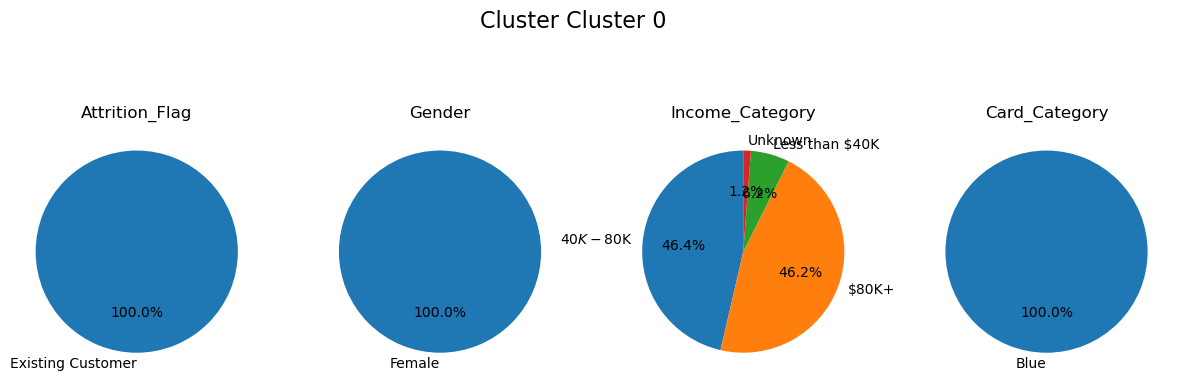

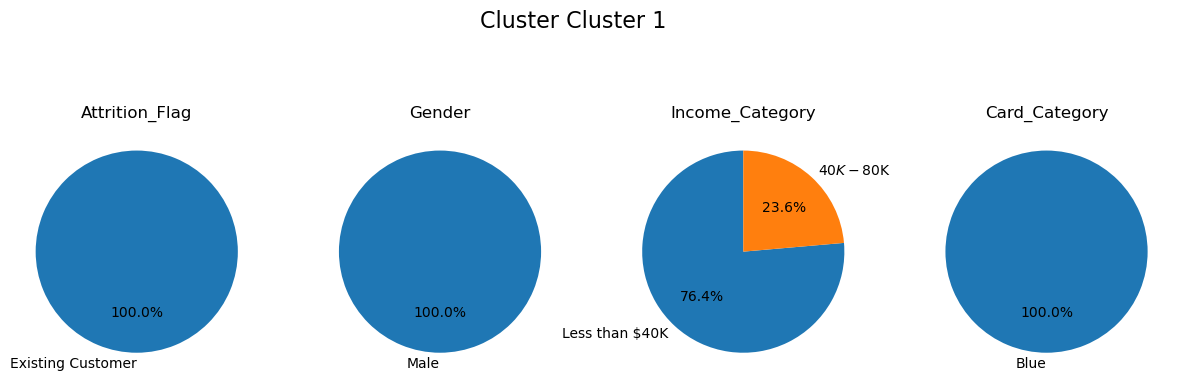

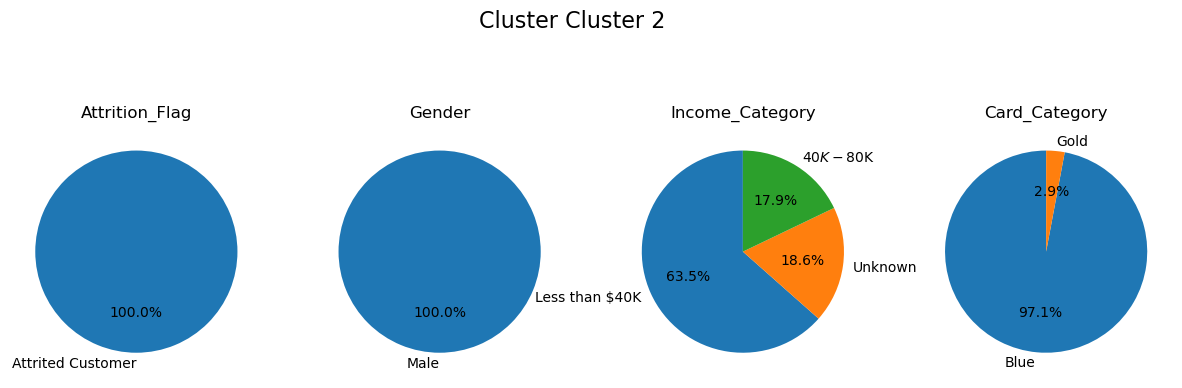

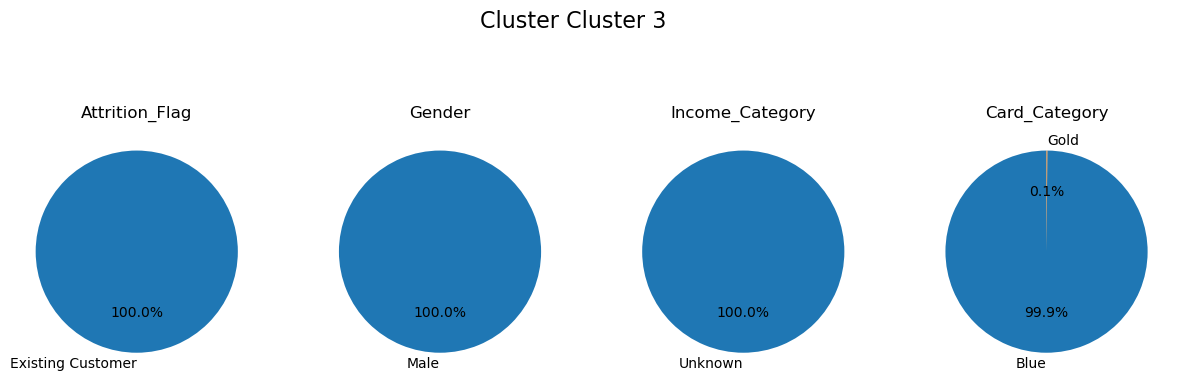

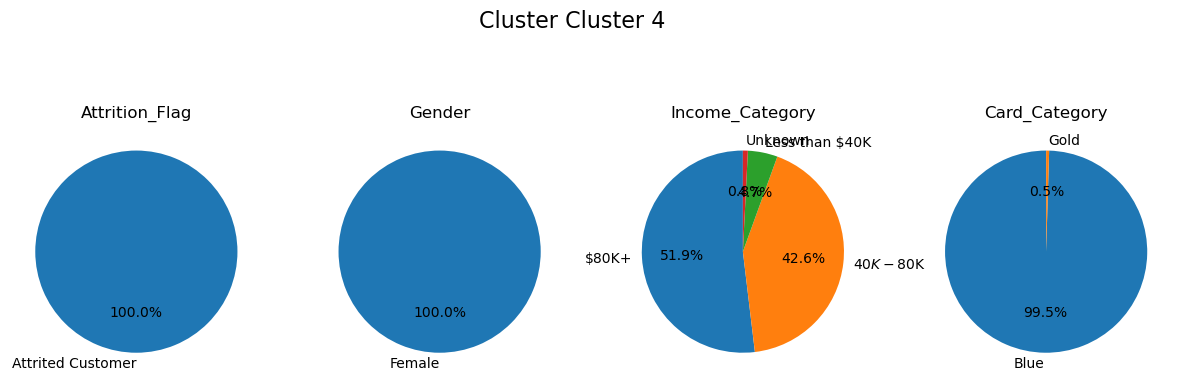

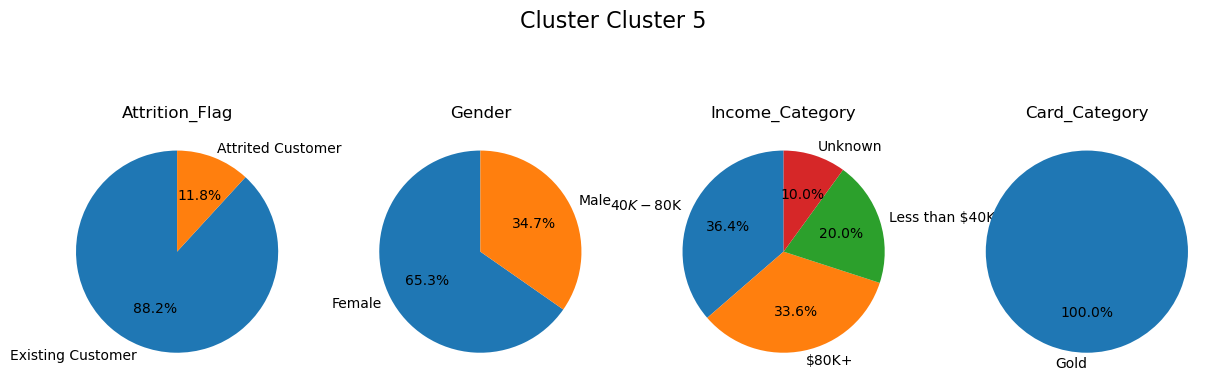

In [225]:
columns = df_results.columns.sort_values()
for cluster in columns:
    cluster_data = df_results[cluster]
    fig, axes = plt.subplots(1, len(cat_features), figsize=(15, 5))
    fig.suptitle(f'Cluster {cluster}', fontsize=16)

    for i, feature in enumerate(cat_features):
        ax = axes[i]
        feature_data = cluster_data[feature]
        ax.pie(feature_data.values(), labels=feature_data.keys(), autopct='%1.1f%%', startangle=90)
        ax.set_title(feature)

    plt.show()

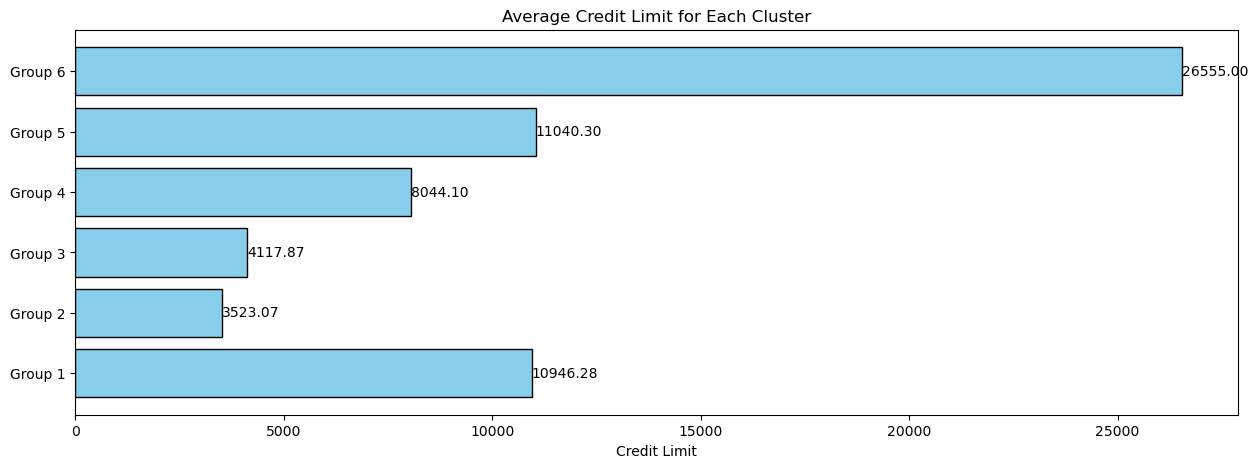

In [226]:
df_cluster = df[['Credit_Limit', 'Cluster']]
fig, axs = plt.subplots(nrows=1, figsize=(15, 5))

for i in range(6):
    cluster_df = df_cluster[df_cluster['Cluster'] == i].mean()
    axs.barh(y=i + 1, width=cluster_df['Credit_Limit'], color='skyblue', edgecolor='black')
    axs.text(cluster_df['Credit_Limit'], i + 1, f'{cluster_df["Credit_Limit"]:.2f}', va='center')

axs.set_yticks(range(1, 7))
axs.set_yticklabels([f'Group {i}' for i in range(1, 7)])
axs.set_xlabel('Credit Limit')
axs.set_title('Average Credit Limit for Each Cluster')

plt.show()

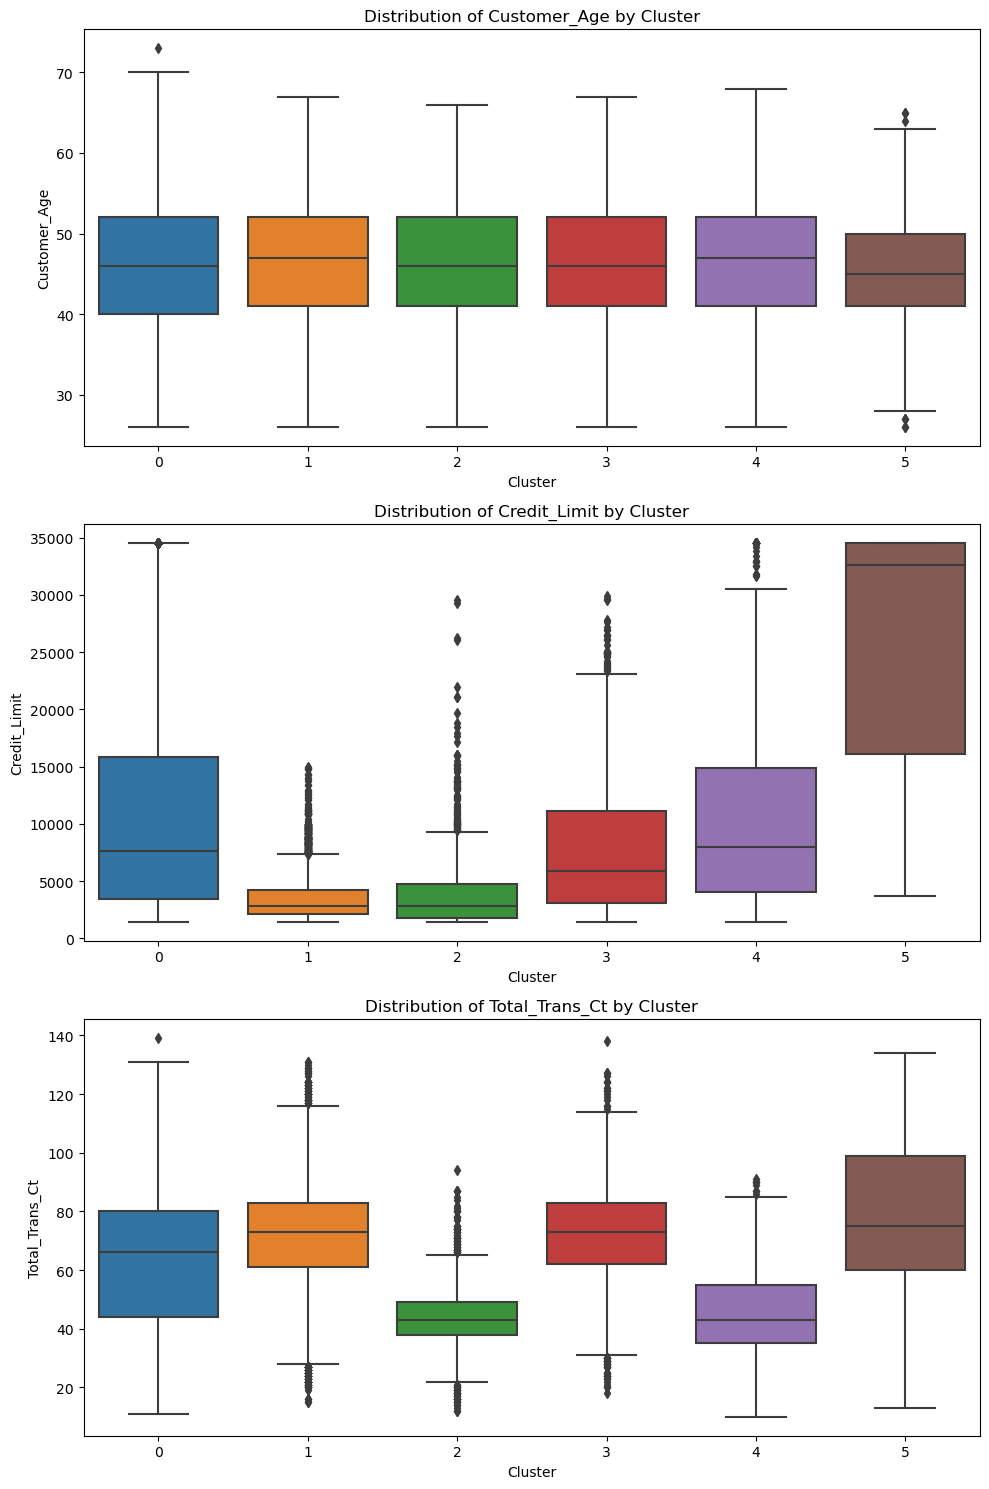

In [227]:
features = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Ct']
df_clusters = df_start[['Customer_Age', 'Credit_Limit', 'Total_Trans_Ct', 'Cluster']]

fig, axs = plt.subplots(len(features), figsize=(10, 15))

for i, feature in enumerate(features):
    sea.boxplot(x='Cluster', y=feature, data=df_clusters, ax=axs[i])
    axs[i].set_title(f'Distribution of {feature} by Cluster')

plt.tight_layout()
plt.show()

In [228]:
cluster_2_df = df_start[df_start['Cluster'] == 2]
c2_means = cluster_2_df.mean()

clusters_0135_df = df_start[df_start['Cluster'].isin([0, 1, 3, 5])]
c0135_means = clusters_0135_df.mean()

cluster_4_df = df_start[df_start['Cluster'] == 4]
c4_means = cluster_4_df.mean()

print('Means for Cluster 4:')
print(c4_means)

print('\Means for Cluster 2:')
print(c2_means)

print('\Means for Clusters 0, 1, 3, 5:')
print(c0135_means)

Means for Cluster 4:
Attrition_Flag                  1.000000
Customer_Age                   46.697785
Gender                          1.000000
Dependent_count                 2.419304
Education_Level                 1.643987
Marital_Status                  1.500000
Income_Category                 1.487342
Card_Category                   0.004747
Months_on_book                 36.248418
Total_Relationship_Count        3.140823
Months_Inactive_12_mon          2.693038
Contacts_Count_12_mon           3.015823
Credit_Limit                11040.304589
Total_Revolving_Bal           677.919304
Avg_Open_To_Buy             10362.385285
Total_Amt_Chng_Q4_Q1            0.705106
Total_Trans_Amt              3363.096519
Total_Trans_Ct                 45.313291
Total_Ct_Chng_Q4_Q1             0.574367
Avg_Utilization_Ratio           0.114872
Cluster                         4.000000
dtype: float64
\Means for Cluster 2:
Attrition_Flag                 1.000000
Customer_Age                  46.598691
G

In [229]:
df_start.groupby('Cluster').describe().T

Cluster                                    0             1             2  \
Attrition_Flag           count   3706.000000   3387.000000    917.000000   
                         mean       0.000000      0.000000      1.000000   
                         std        0.000000      0.000000      0.000000   
                         min        0.000000      0.000000      1.000000   
                         25%        0.000000      0.000000      1.000000   
                         50%        0.000000      0.000000      1.000000   
                         75%        0.000000      0.000000      1.000000   
                         max        0.000000      0.000000      1.000000   
Customer_Age             count   3706.000000   3387.000000    917.000000   
                         mean      46.109012     46.587836     46.598691   
                         std        8.239203      7.996577      7.557084   
                         min       26.000000     26.000000     26.000000   
                         25%       40.000000     41.000000     41.000000   
                         50%       46.000000     47.000000     46.000000   
                         75%       52.000000     52.000000     52.000000   
                         max       73.000000     67.000000     66.000000   
Gender                   count   3706.000000   3387.000000    917.000000   
                         mean       1.000000      0.000000      0.000000   
                         std        0.000000      0.000000      0.000000   
                         min        1.000000      0.000000      0.000000   
                         25%        1.000000      0.000000      0.000000   
                         50%        1.000000      0.000000      0.000000   
                         75%        1.000000      0.000000      0.000000   
                         max        1.000000      0.000000      0.000000   
Dependent_count          count   3706.000000   3387.000000    917.000000   
                         mean       2.317593      2.333038      2.375136   
                         std        1.284517      1.309732      1.274949   
                         min        0.000000      0.000000      0.000000   
                         25%        1.000000      1.000000      1.000000   
                         50%        2.000000      2.000000      2.000000   
                         75%        3.000000      3.000000      3.000000   
                         max        5.000000      5.000000      5.000000   
Education_Level          count   3706.000000   3387.000000    917.000000   
                         mean       1.645170      1.672867      1.705562   
                         std        0.901999      0.906030      0.896683   
                         min        0.000000      0.000000      0.000000   
                         25%        1.000000      1.000000      1.000000   
                         50%        2.000000      2.000000      2.000000   
                         75%        2.000000      2.000000      2.000000   
                         max        3.000000      3.000000      3.000000   
Marital_Status           count   3706.000000   3387.000000    917.000000   
                         mean       1.445224      1.456451      1.482007   
                         std        0.734972      0.728365      0.739521   
                         min        0.000000      0.000000      0.000000   
                         25%        1.000000      1.000000      1.000000   
                         50%        1.000000      1.000000      1.000000   
                         75%        2.000000      2.000000      2.000000   
                         max        3.000000      3.000000      3.000000   
Income_Category          count   3706.000000   3387.000000    917.000000   
                         mean       1.424177      0.236197      0.738277   
                         std        0.626710      0.424807      1.146090   
                         min        0.000000    

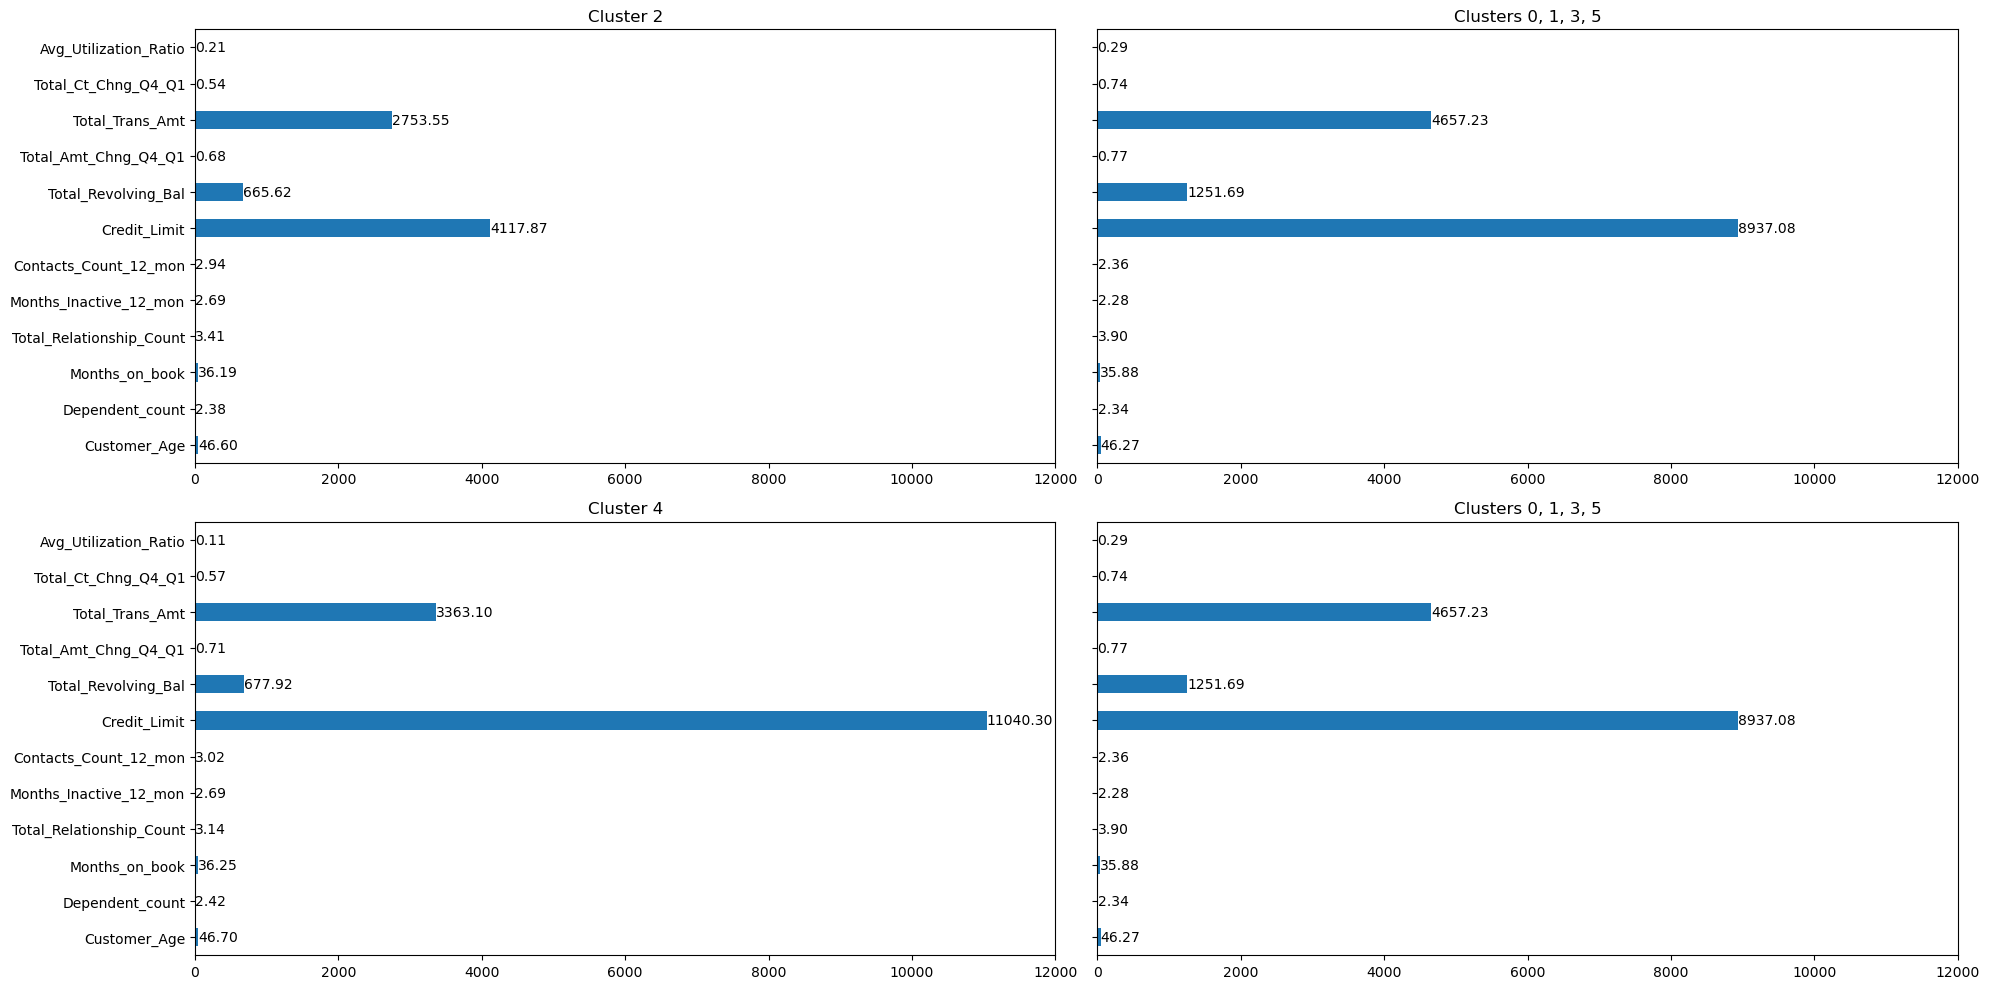

In [230]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

def plot_with_labels(data, ax, title):
    data.plot.barh(ax=ax, xlim=(0, 12000), figsize=(20, 10), sharey=True, title=title)
    for i, value in enumerate(data.values):
        ax.text(value + 0.01, i, f'{value:.2f}', ha='left', va='center', color='black')

plot_with_labels(df_start[df_start['Cluster'] == 2][numerical_columns].mean(), axs[0, 0], 'Cluster 2')
plot_with_labels(df_start[df_start['Cluster'].isin([0, 1, 3, 5])][numerical_columns].mean(), axs[0, 1], 'Clusters 0, 1, 3, 5')
plot_with_labels(df_start[df_start['Cluster'] == 4][numerical_columns].mean(), axs[1, 0], 'Cluster 4')
plot_with_labels(df_start[df_start['Cluster'].isin([0, 1, 3, 5])][numerical_columns].mean(), axs[1, 1], 'Clusters 0, 1, 3, 5')

plt.tight_layout()
plt.show()


Analiza između klastera 2 i klastera 0, 1, 3, 5 otkriva značajne razlike u nekoliko atributa. Posebno, klaster 2, koji predstavlja korisnike koji su napustili banku (Attrition_Flag = 1), pokazuje različite obrasce u poređenju sa kombinovanim klasterima 0, 1, 3, 5:

- Kategorija prihoda: Niži prosek u klasteru 2 (0.74) sugeriše da ovi korisnici možda pripadaju nižoj kategoriji prihoda u odnosu na kalstere 0,1,3,5 (1.1).
- Kreditni limit i ukupni revolving balans: Oba su značajno niža u klasteru 2 (4118 - 666), što ukazuje da su ovi korisnici možda imali nižu upotrebu kredita ili niže ponuđene kreditne limite (8937 - 1252).
- Meseci neaktivnosti u poslednjih 12 meseci i broj kontakata u poslednjih 12 meseci: Viši su u klasteru 2 (2.69 - 2.93), 
što sugeriše na neaktivnost i moguće veće nezadovoljstvo ili probleme koji dovode do više kontakata pre napuštanja (2.28 - 2.36).
- Ukupan broj transakcija: Značajno niži u klasteru 2 (44), što ukazuje na neaktivnost korisnika u korišćenju usluga u odnosu na broj transakcija u ostalim klasterima (0,1,3,5) (68)

Analiza između klastera 4 i klastera 0, 1, 3, 5 takođe pokazuje značajne razlike, pri čemu klaster 4 predstavlja još jedan segment korisnika koji su napustili banku (Attrition_Flag = 1):

- Kategorija prihoda: Viši prosek u klasteru 4 (1.487) sugeriše da ovi korisnici možda pripadaju višoj kategoriji prihoda u poređenju sa klasterom 2.
- Kreditni limit i Ukupni revolving balans: Kreditni limit je značajno veći u klasteru 4, što ukazuje da su ovi korisnici možda imali veću upotrebu kredita ili su im bili ponuđeni viši kreditni limiti (11040 - 678).
- Meseci neaktivnosti u poslednjih 12 meseci i Broj kontakata u poslednjih 12 meseci: Slično kao i kod klastera 2, viši su u klasteru 4, 
što sugeriše na neaktivnost i moguće veće nezadovoljstvo ili probleme koji dovode do više kontakata pre napuštanja (2.7 - 3).
- Ukupan broj transakcija: Značajno niži u klasteru 4 (45), što ukazuje na neaktivnost korisnika u korišćenju usluga u odnosu na broj transakcija u ostalim klasterima (0,1,3,5) (68)

Zaključno, analize ukazuju na to da neaktivnost, veći broj kontakata s bankom, i niži kreditni limiti mogu biti ključni faktori koji doprinose odluci korisnika da napuste usluge banke. 
Razumevanje ovih faktora može pomoći banci u razvijanju strategija za zadržavanje korisnika.

Personalizovane ponude za korisnike u klasteru 2:
S obzirom na niži prosek kategorije prihoda u klasteru 2, banka može kreirati personalizovane ponude, popuste ili programe lojalnosti za korisnike u ovoj kategoriji. 
Ovo može uključivati prilagođene bankarske proizvode ili usluge koje bolje odgovaraju njihovim finansijskim potrebama.

Ponude i pogodnosti za korisnike u klasteru 4:
Za korisnike u klasteru 4, koji pripadaju višoj kategoriji prihoda, banka može razviti premium ponude, ekskluzivne beneficije 
ili dodatne usluge koje odgovaraju njihovim finansijskim potrebama i očekivanjima.

Analiza zadovoljstva i unapređenje korisničkog iskustva:
Visok broj kontakata u poslednjih 12 meseci i meseci neaktivnosti može ukazivati na nezadovoljstvo korisnika ili probleme u korisničkom iskustvu. 
Banka može sprovesti dodatne ankete ili istraživanja zadovoljstva kako bi identifikovala konkretne tačke nezadovoljstva i preduzela korake za poboljšanje usluga.

Edukacija o proizvodima i uslugama:
Banka može pružiti dodatnu edukaciju korisnicima o dostupnim proizvodima i uslugama, posebno onima koji imaju niže kreditne limite ili nisku upotrebu kredita. 
Edukacija može pomoći korisnicima da bolje iskoriste ponuđene opcije i razumeju beneficije koje im pruža banka.

Analiza rizika napuštanja:
Banka može implementirati alate za praćenje i analizu ponašanja korisnika kako bi prepoznala rizike od napuštanja u ranoj fazi. Na osnovu tih analiza, 
mogu se preduzeti preventivne akcije, poput pravovremenog kontaktiranja korisnika i rešavanja njihovih problema.